# Chapter4: 逻辑回归-给病患和鸢尾花分类

**特征工程**：从文本向数值转换的过程。因为机器不能识别字符但是可以识别数值。

##4.2.3 Sigmoid function\
既可以更好地拟合以概率为代表的分类结果，又能抑制两遍比较接近0和1 的极端例子，使之钝化，同时还可以保持函数拟合时对中间部分数据细微变化的敏感度。
$$g(z)=\frac{1}{1+e^{-z}}$$
用z而不用x的原因是因为这是一个中间变量，代表线性回归的结果。$g(z)$输出的结果则是一个0~1的数字。\
$Z=W^T*B$\
Loss function in logistic regression:
$$L(w,b)=\frac{1}{N}\sum_{(x,y)\in D} Loss(h(x),y)=\frac{1}{N}\sum_{(x,y)\in D}Loss(y',y)$$
loss funciton in specific way:
$$Loss(h\left(x\right),y)=y*log\left(h\left(x\right)\right)+\left(1-y\right)*log\left(1-h\left(x\right)\right)$$
进行逻辑回归的梯度计算公式：
$$梯度=h'(x)=\frac{\partial}{\partial w}L(w,b)=\frac{1}{N}\sum_{i=1}^N(y^{(i)}-h(x^{(i)}))*x^{(i)}$$
如果引入学习速率之后，参数梯度变化的更新公式为：
$$w=w-\alpha*\frac{\partial}{\partial w}L(w)$$

## 4.3 通过逻辑回归解决二元分类问题

in the data set 'heart.csv':
* cp: 绞痛类型
* trestbps: 休息时血压
* chol: 胆固醇
* fbs: 血糖（1=超标，0=未超标）
* restecg: 心电图
* thalach: 最大心率
* exang: 运动后心绞痛（1=yes,0=no)
* oldpeak: 运动后ST段压低
* ca: 主动脉荧光造影染色数
* thal:缺陷种类
* target: 1=有心脏病；0=无心脏病


In [2]:
import numpy as np
import pandas as pd
df_heart=pd.read_csv('heart.csv')
df_heart.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [3]:
df_heart.target.value_counts()
#This is necessary。 如果木一种类别数目过于稀少，如只有1、2个的话，那么不适合进行logistic Regression

1    165
0    138
Name: target, dtype: int64

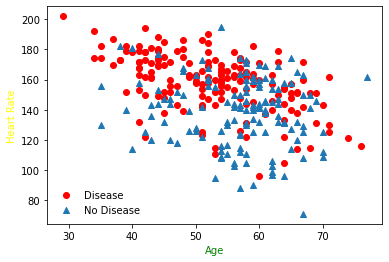

In [8]:
import matplotlib.pyplot as plt
plt.scatter(x=df_heart.age[df_heart.target==1],y=df_heart.thalach[(df_heart.target==1)],c='red')
plt.scatter(x=df_heart.age[df_heart.target==0],y=df_heart.thalach[(df_heart.target==0)],marker='^')
plt.legend(['Disease','No Disease'],frameon=False,loc='lower left')
plt.xlabel('Age').set_color('green')
plt.ylabel('Heart Rate').set_color('yellow')
plt.show()

In [10]:
#Step2：构建特征tensor与Label Tensor
X=df_heart.drop(['target'],axis=1)#构建特征集
y=df_heart.target.values#构建标签集
y=y.reshape(-1,1)#-1为相对索引，等价于len(y)
print('Tensor X的形状：',X.shape)
print('Tensor y的形状：',y.shape)

Tensor X的形状： (303, 13)
Tensor y的形状： (303, 1)


In [11]:
#Step 3: 拆分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [13]:
#Step 4: 数据特征缩放:这里用sklearn 中的内置数据缩放器 MinMaxScalar
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()#选择归一化数据缩放器
X_train=scaler.fit_transform(X_train)#fit_transform表示先拟合再应用
X_test=scaler.transform(X_test)#这里是直接应用，这个和测试集是使用不同的方法



### 4.3.2 建立逻辑回归模型

#### Step1: Def logistic Function

In [16]:
def sigmoid(z):
    y_hat=1/(1+np.exp(-z))
    return y_hat

#### Step2: def loss function

In [17]:
def loss_function(X,y,w,b):
    y_hat=sigmoid(np.dot(X,w)+b)
    loss=-((y*np.log(y_hat)+(1-y)*np.log(1-y_hat)))
    cost=np.sum(loss)/X.shape[0]# 这里X.shape[0]代表样本数目
    return cost


#### Step3: 梯度下降的实现

In [27]:
def gradient_descent(X,y,w,b,lr,iter):
    l_history=np.zeros(iter)
    w_history=np.zeros((iter,w.shape[0],w.shape[1]))
    b_history=np.zeros(iter)
    for i in range(iter):
        y_hat=sigmoid(np.dot(X,w)+b)
        loss=-(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))
        derivative_w=np.dot(X.T,((y_hat-y)))/X.shape[0]#给权重向量求导,梯度下降公式1/N*(y-h(x))*x
        derivative_b=np.sum(y_hat-y)/X.shape[0]
        w=w-lr*derivative_w
        b=b-lr*derivative_b
        l_history[i]=loss_function(X,y,w,b)
        print('轮次',i+1,'当前轮训练集损失',l_history[i])
        w_history[i]=w
        b_history[i]=b
    return l_history,w_history,b_history

#### Step4: 分类预测的实现
直接调用gradient_descent 来实现

In [19]:
loss_history,weight_history,bias_history=gradient_descent(X_train,y_train,weight,bias,alpha,iteration)


NameError: name 'weight' is not defined

In [46]:
#定义一个负责分类预测的函数
def predict(X,w,b):
    z=np.dot(X,w)+b
    y_hat=sigmoid(z)
    y_pred=np.zeros((y_hat.shape[0],1))#初始化预测结果变量,之前运行错误是因为.shape后面要加上[0]而不是(0)
    for i in range(y_hat.shape[0]):
        if y_hat[i,0]<0.5:
            y_pred[i,0]=0
        else:
            y_pred[i,0]=1
    return y_pred

### 4.3.3 开始训练机器
首先把上面的所有内容封装成一个logistic function:

In [47]:
def logistic_regression(X,y,w,b,lr,iter):
    l_history,w_history,b_history=gradient_descent(X,y,w,b,lr,iter)
    print('最终训练损失：',l_history[-1])
    y_pred=predict(X,w_history[-1],b_history[-1])
    training_acc=100-np.mean(np.abs(y_pred-y_train))*100
    print('逻辑回归的准确率：{:.2f}%'.format(training_acc))
    return l_history,w_history,b_history

In [43]:
print(X.shape[1])
print(X.shape[0])


13
303


In [48]:
#准备好参数的初始值：
dimension=X.shape[1]#这里的维度len(X)是矩阵的行的数目，维度是列的数目
weight=np.full((dimension,1),0.1)#权重向量，向量一般是1D，但这里实际上创建了2D Tensor
bias=0
alpha=1
iterations=500


In [49]:
#用逻辑回归函数训练机器
loss_history,weight_history,bias_history=logistic_regression(X_train,y_train,weight,bias,alpha,iterations)

轮次 1 当前轮训练集损失 0.6707409475623884
轮次 2 当前轮训练集损失 0.6487295013515437
轮次 3 当前轮训练集损失 0.6293974256031468
轮次 4 当前轮训练集损失 0.6123055727357058
轮次 5 当前轮训练集损失 0.5971515206555165
轮次 6 当前轮训练集损失 0.5836721796724823
轮次 7 当前轮训练集损失 0.571640393625354
轮次 8 当前轮训练集损失 0.5608612174675108
轮次 9 当前轮训练集损失 0.5511679791826082
轮次 10 当前轮训练集损失 0.5424184609000116
轮次 11 当前轮训练集损失 0.5344913836779723
轮次 12 当前轮训练集损失 0.5272832777683938
轮次 13 当前轮训练集损失 0.5207057570811029
轮次 14 当前轮训练集损失 0.5146831808791914
轮次 15 当前轮训练集损失 0.5091506678280683
轮次 16 当前轮训练集损失 0.5040524205103251
轮次 17 当前轮训练集损失 0.49934031779261256
轮次 18 当前轮训练集损失 0.4949727350423813
轮次 19 当前轮训练集损失 0.49091355634067446
轮次 20 当前轮训练集损失 0.4871313474727712
轮次 21 当前轮训练集损失 0.48359866302605214
轮次 22 当前轮训练集损失 0.48029146509749815
轮次 23 当前轮训练集损失 0.4771886347945487
轮次 24 当前轮训练集损失 0.47427156088026456
轮次 25 当前轮训练集损失 0.47152379259386334
轮次 26 当前轮训练集损失 0.4689307459205088
轮次 27 当前轮训练集损失 0.4664794544470434
轮次 28 当前轮训练集损失 0.46415835747991024
轮次 29 当前轮训练集损失 0.4619571193699581
轮次 30 当前轮训练集损失 0.

轮次 294 当前轮训练集损失 0.3906531860076071
轮次 295 当前轮训练集损失 0.39062471088230893
轮次 296 当前轮训练集损失 0.3905964354499353
轮次 297 当前轮训练集损失 0.3905683576176699
轮次 298 当前轮训练集损失 0.3905404753223195
轮次 299 当前轮训练集损失 0.39051278652980176
轮次 300 当前轮训练集损失 0.3904852892346429
轮次 301 当前轮训练集损失 0.39045798145948524
轮次 302 当前轮训练集损失 0.3904308612546054
轮次 303 当前轮训练集损失 0.3904039266974413
轮次 304 当前轮训练集损失 0.39037717589212867
轮次 305 当前轮训练集损失 0.39035060696904683
轮次 306 当前轮训练集损失 0.3903242180843738
轮次 307 当前轮训练集损失 0.39029800741964915
轮次 308 当前轮训练集损失 0.3902719731813468
轮次 309 当前轮训练集损失 0.3902461136004549
轮次 310 当前轮训练集损失 0.3902204269320644
轮次 311 当前轮训练集损失 0.39019491145496626
轮次 312 当前轮训练集损失 0.39016956547125536
轮次 313 当前轮训练集损失 0.39014438730594264
轮次 314 当前轮训练集损失 0.3901193753065749
轮次 315 当前轮训练集损失 0.39009452784286197
轮次 316 当前轮训练集损失 0.3900698433063099
轮次 317 当前轮训练集损失 0.39004532010986315
轮次 318 当前轮训练集损失 0.39002095668755177
轮次 319 当前轮训练集损失 0.38999675149414675
轮次 320 当前轮训练集损失 0.38997270300482006
轮次 321 当前轮训练集损失 0.3899488097148138
轮次 322

#### 4.3.4 预测分类结果

In [50]:
y_pred=predict(X_test,weight_history[-1],bias_history[-1])
testing_acc=100-np.mean(np.abs(y_pred-y_test))*100
print('逻辑回归测试准确率:{:.2f}%'.format(testing_acc))
print('逻辑回归预测分类值：',predict(X_test,weight_history[-1],bias_history[-1]))

逻辑回归测试准确率:91.80%
逻辑回归预测分类值： [[1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]]


#### 4.3.5绘制损失曲线

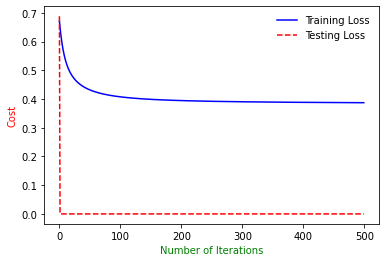

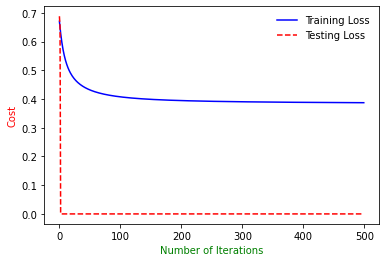

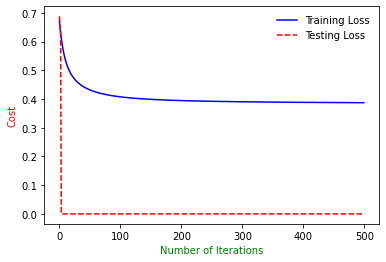

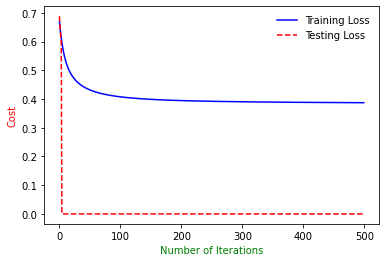

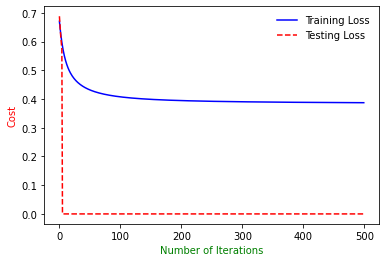

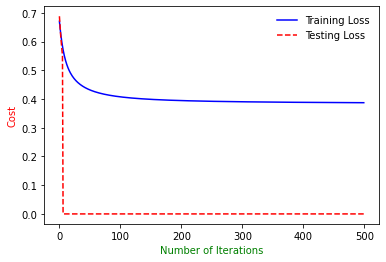

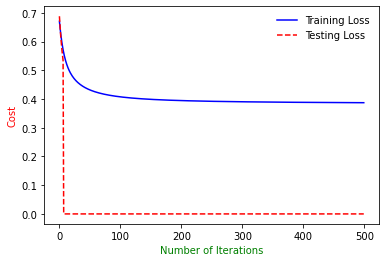

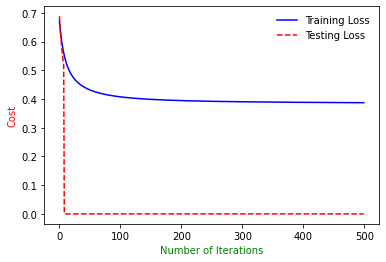

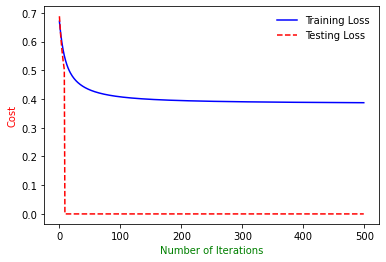

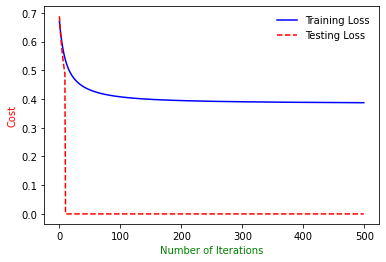

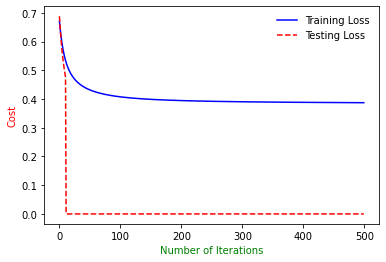

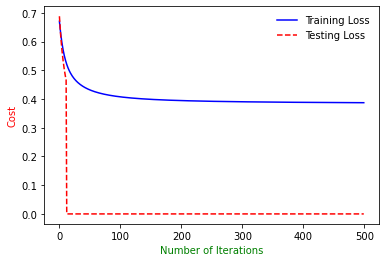

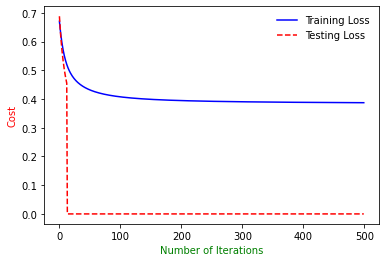

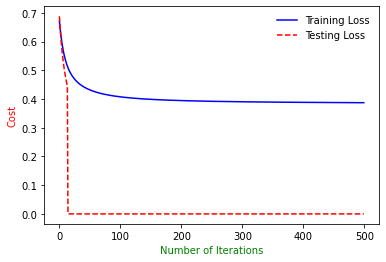

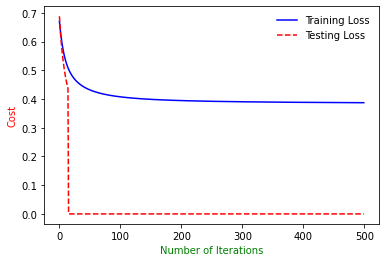

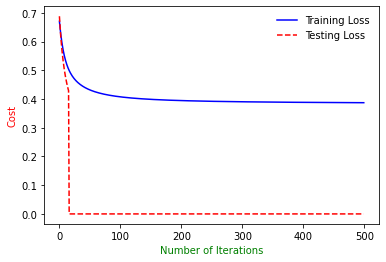

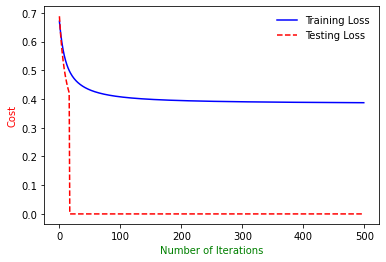

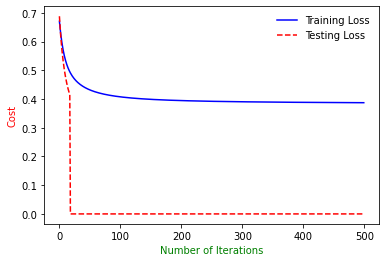

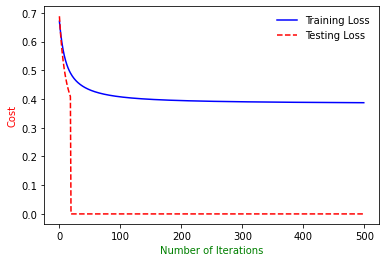

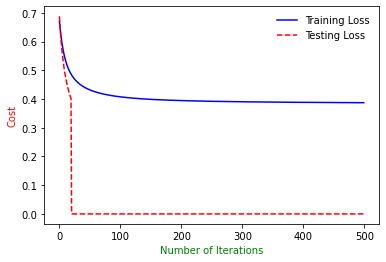

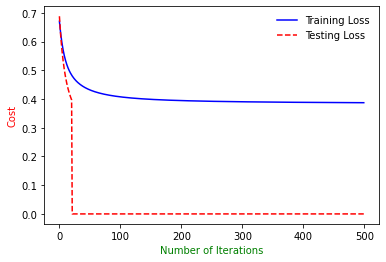

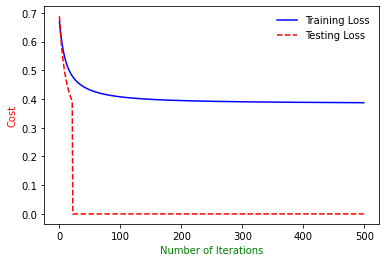

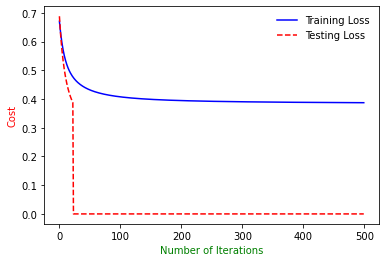

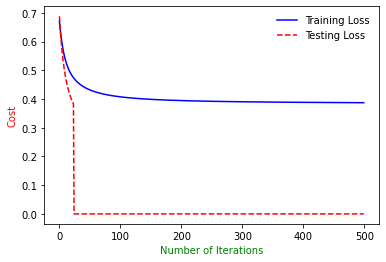

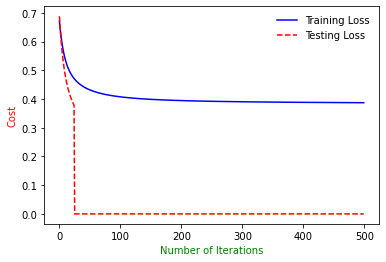

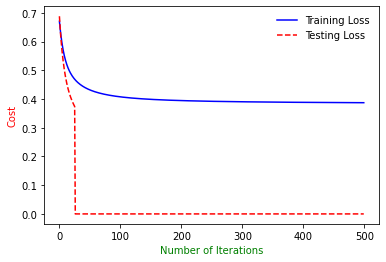

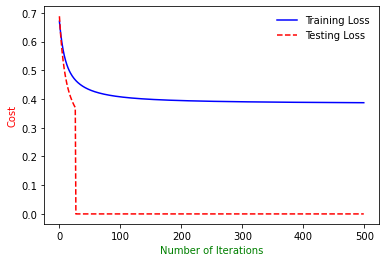

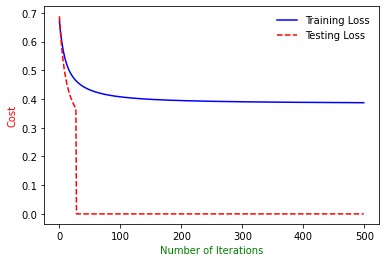

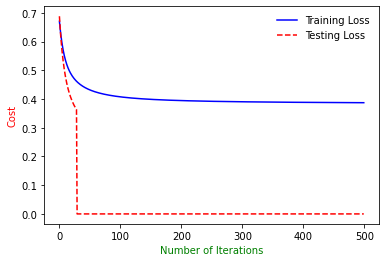

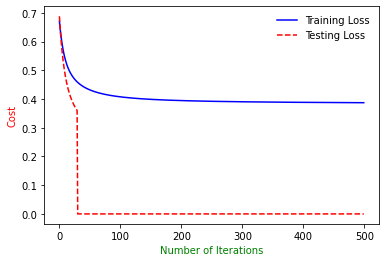

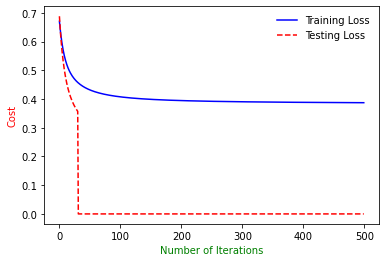

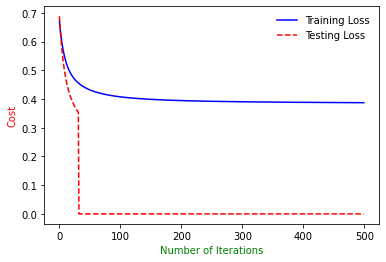

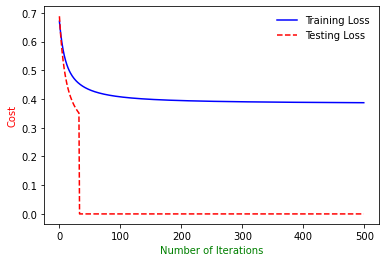

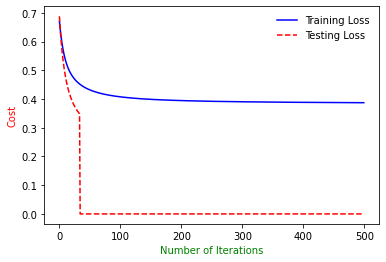

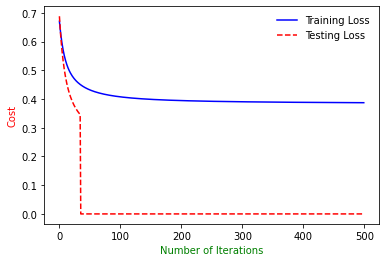

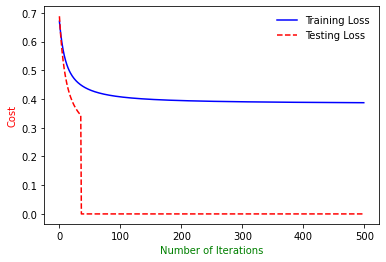

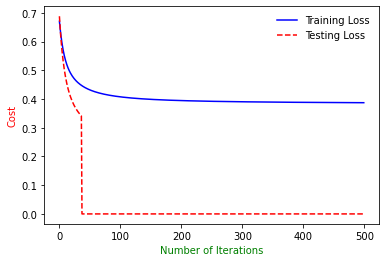

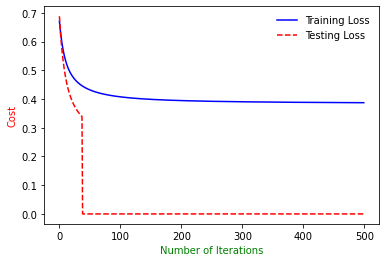

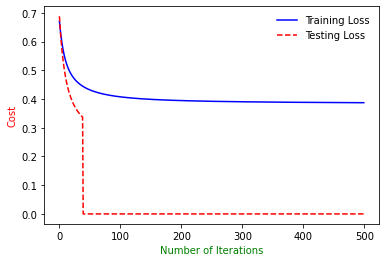

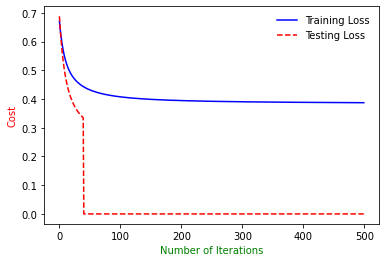

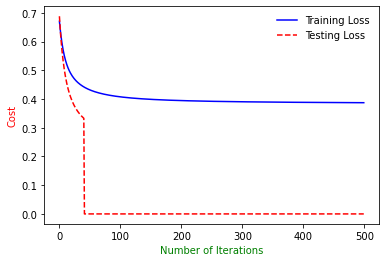

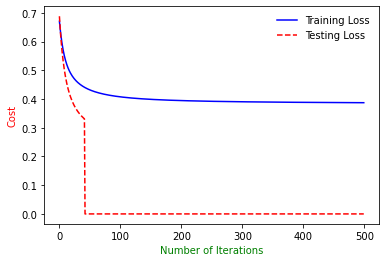

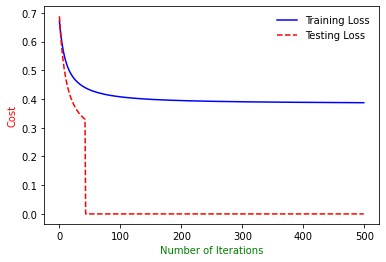

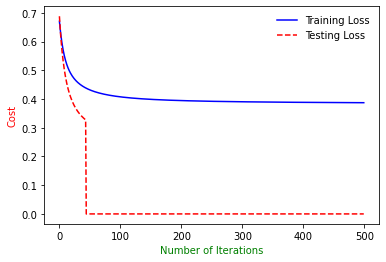

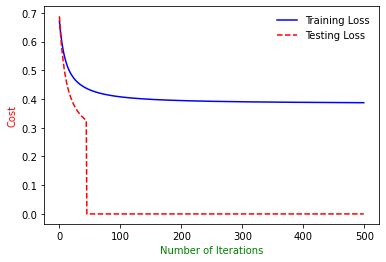

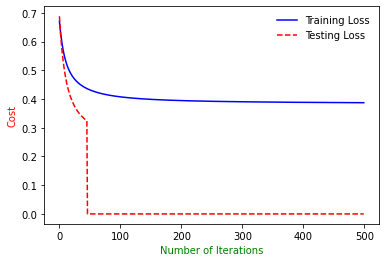

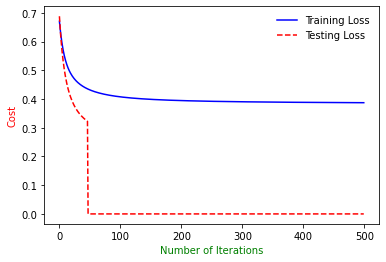

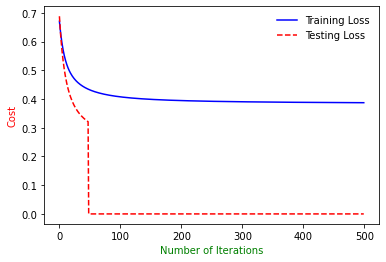

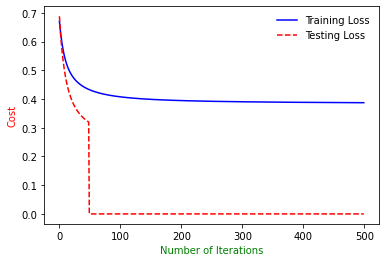

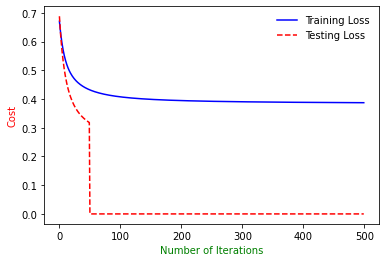

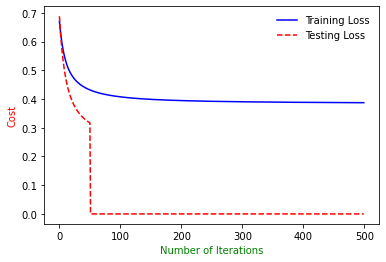

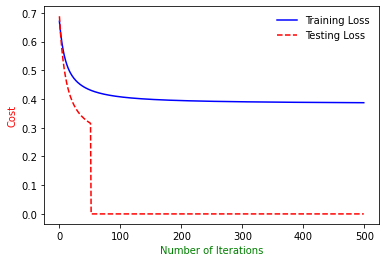

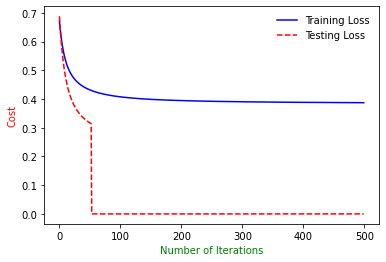

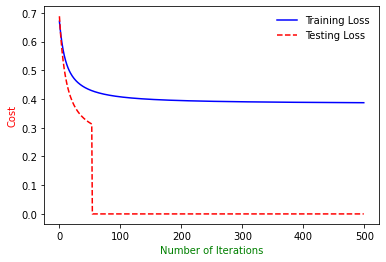

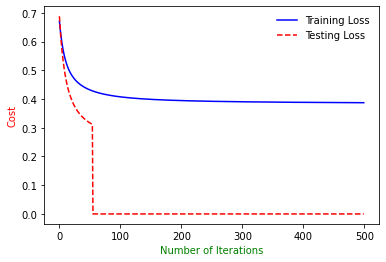

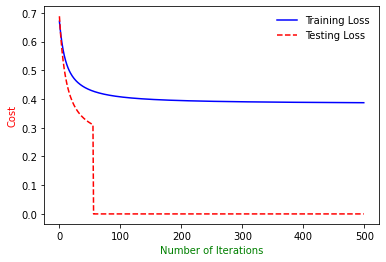

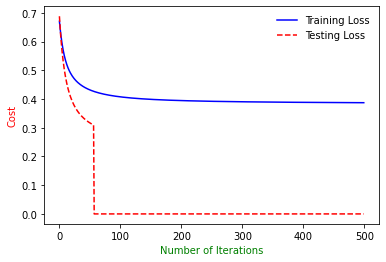

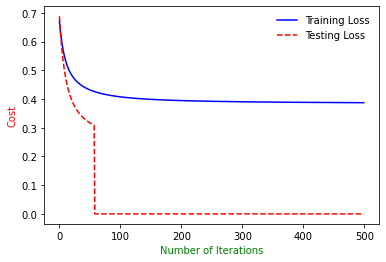

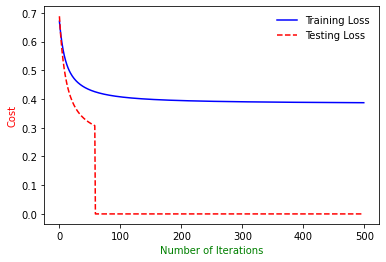

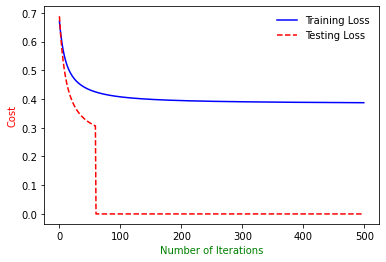

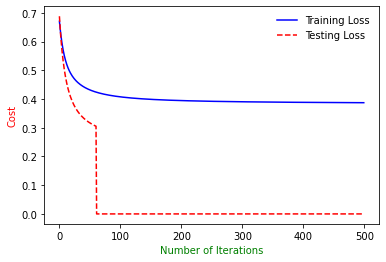

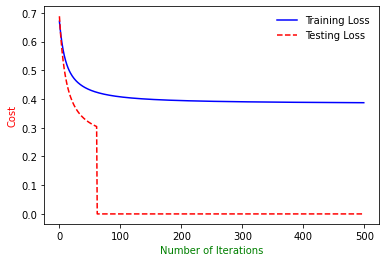

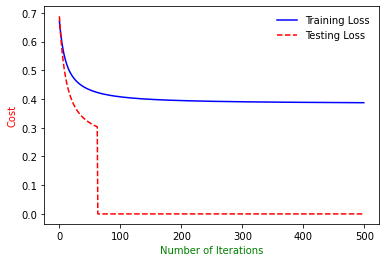

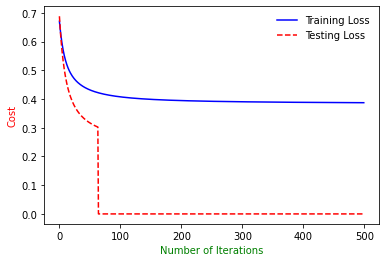

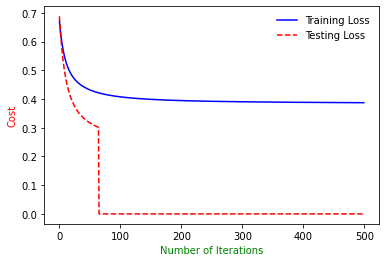

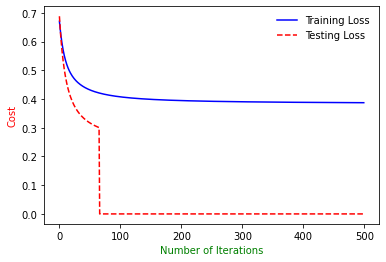

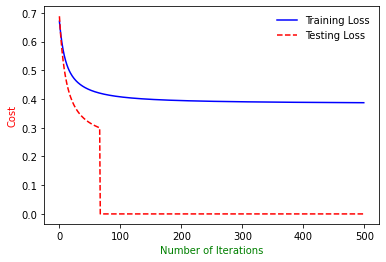

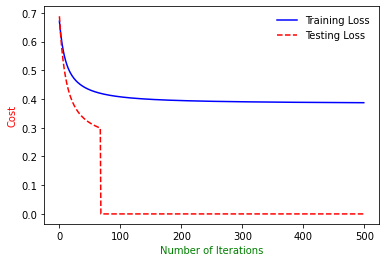

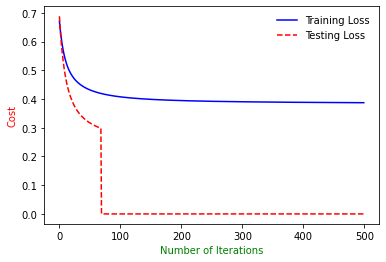

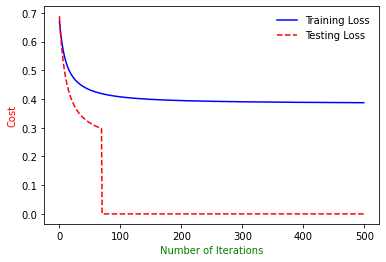

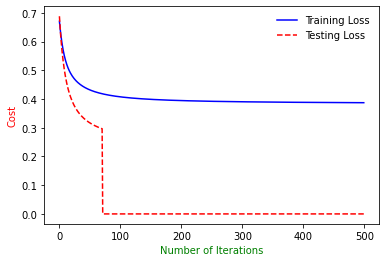

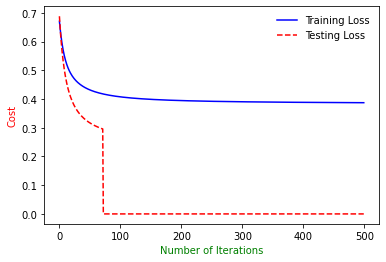

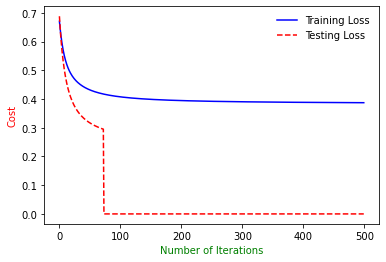

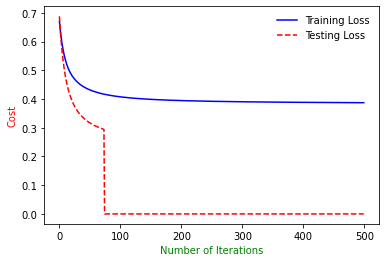

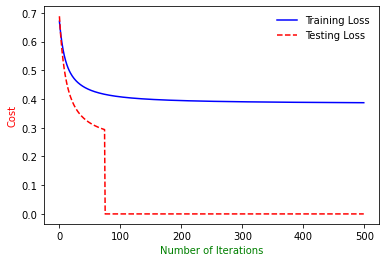

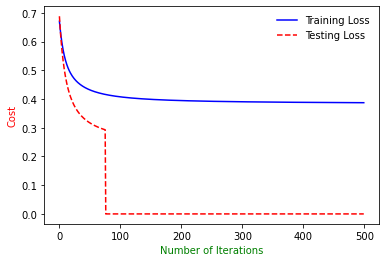

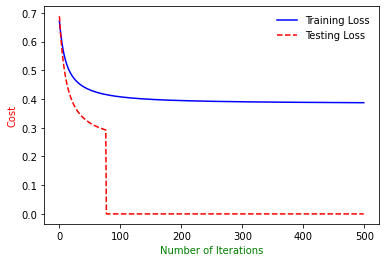

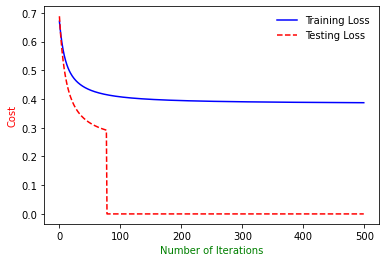

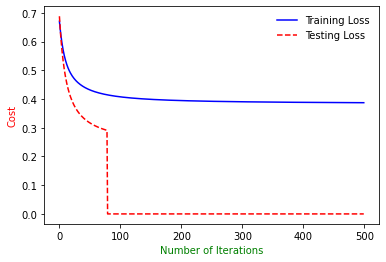

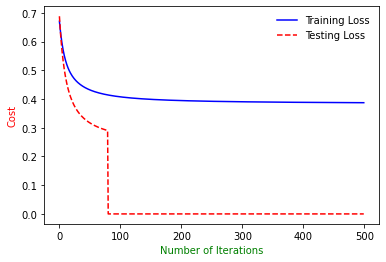

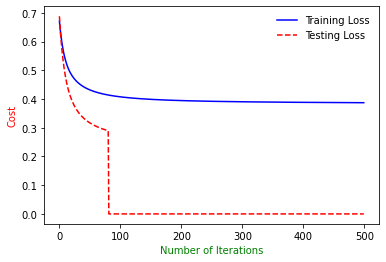

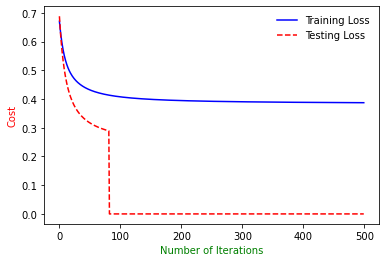

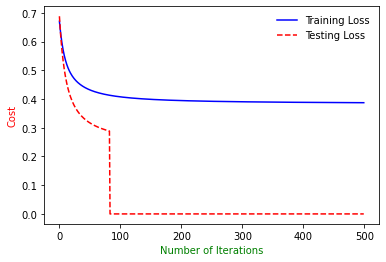

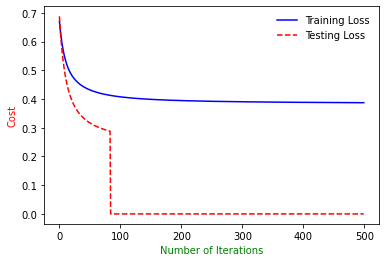

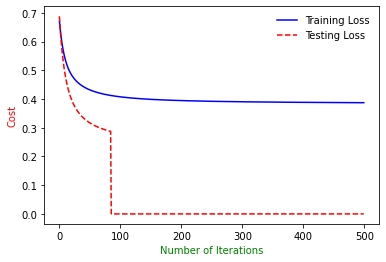

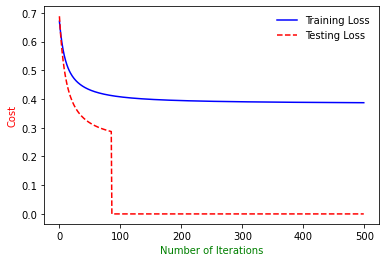

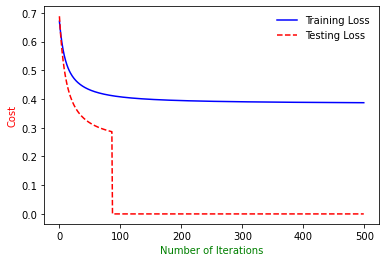

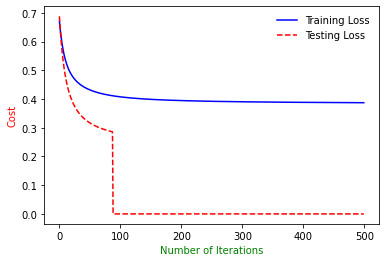

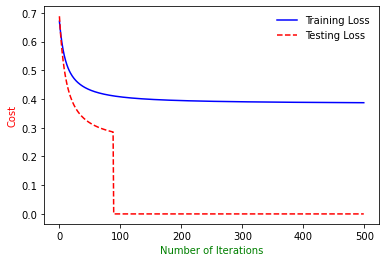

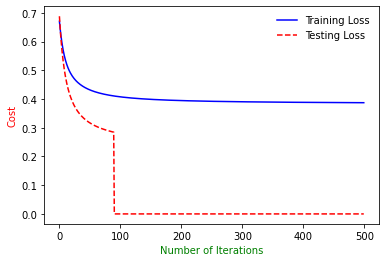

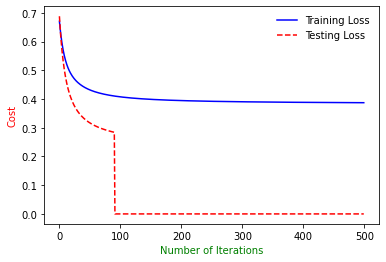

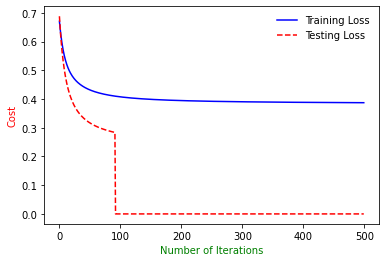

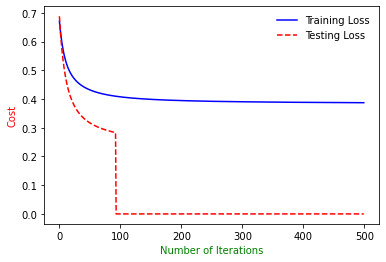

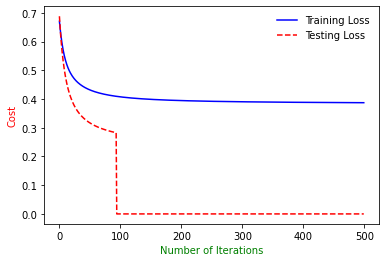

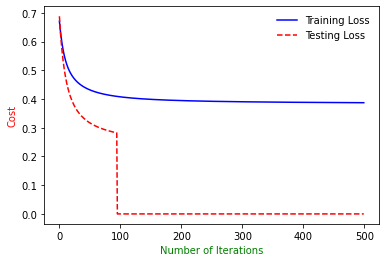

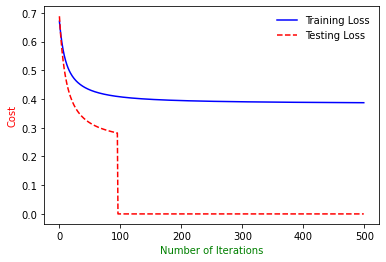

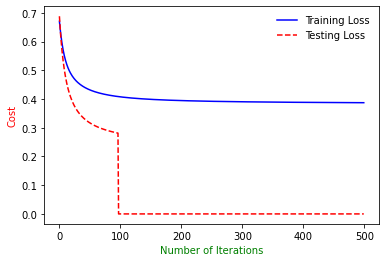

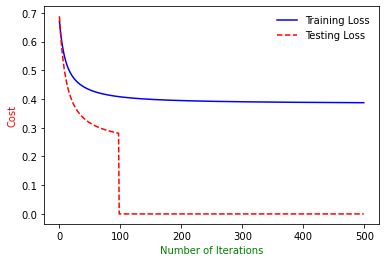

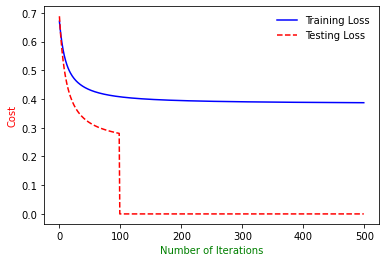

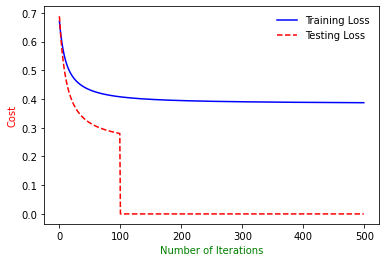

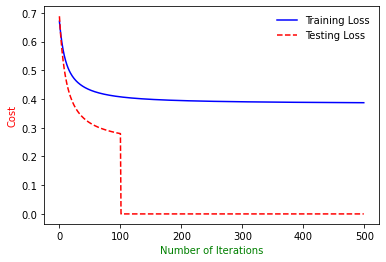

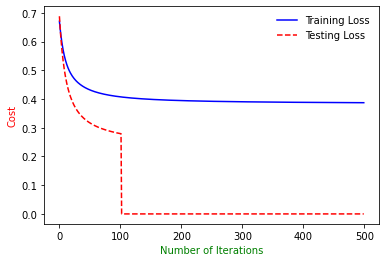

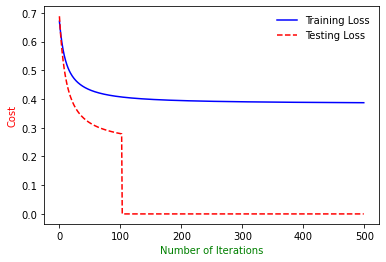

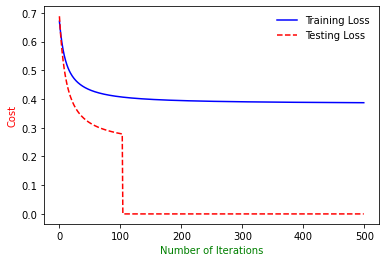

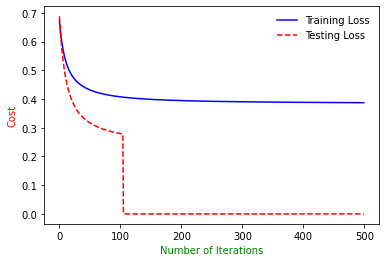

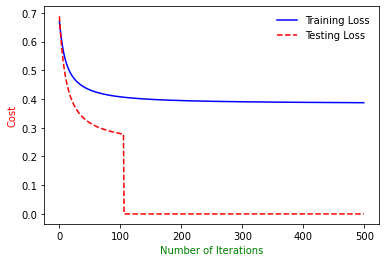

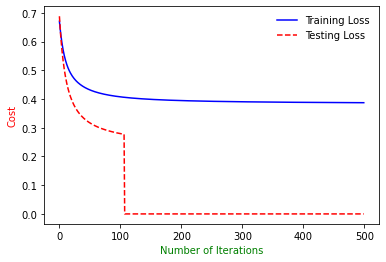

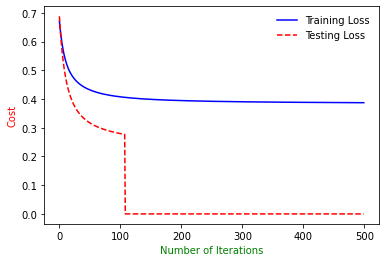

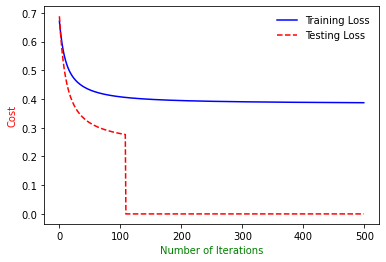

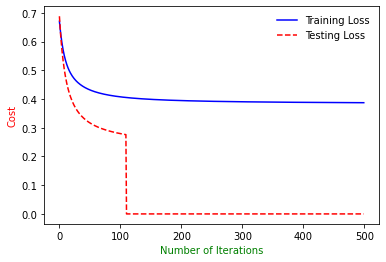

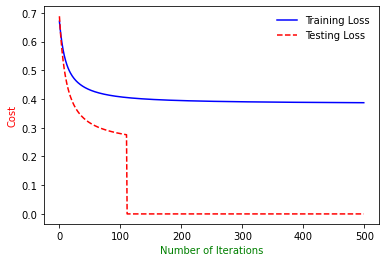

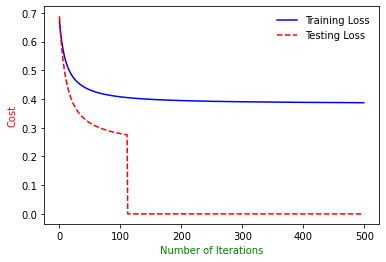

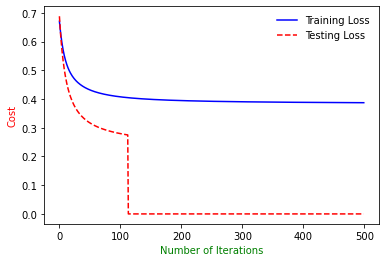

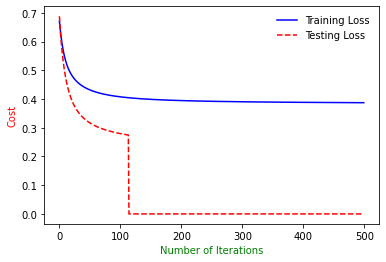

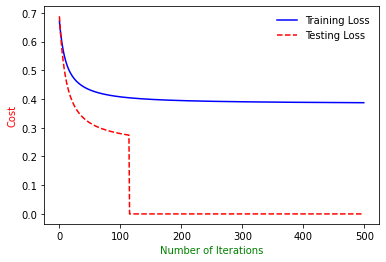

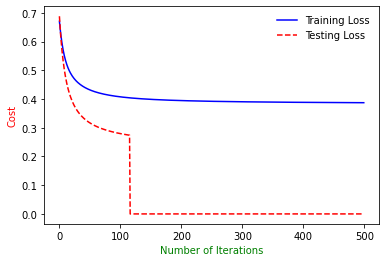

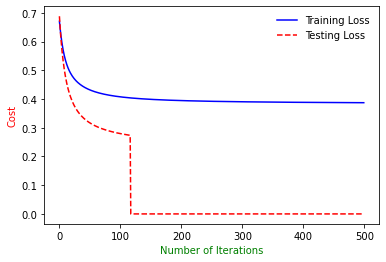

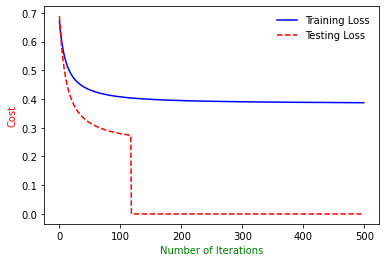

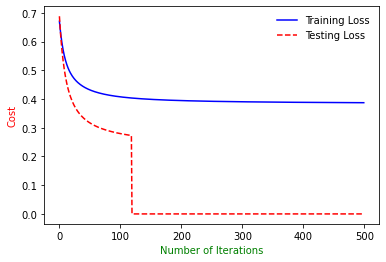

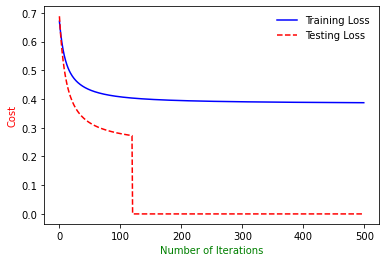

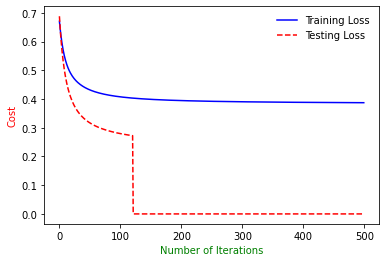

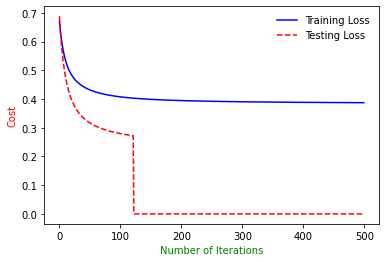

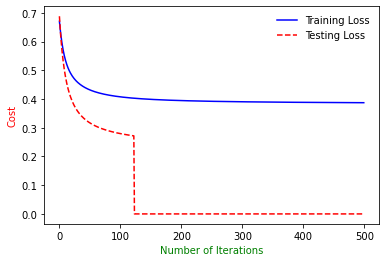

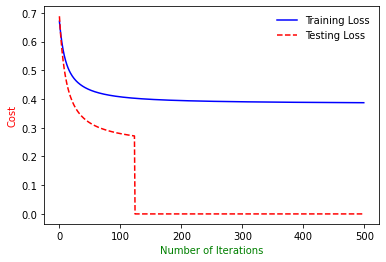

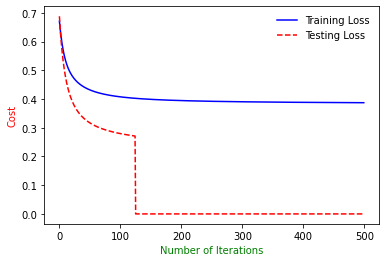

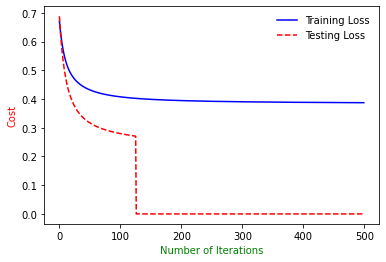

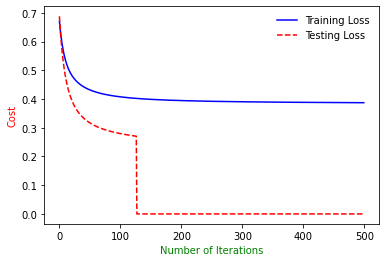

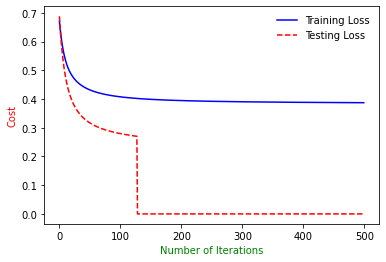

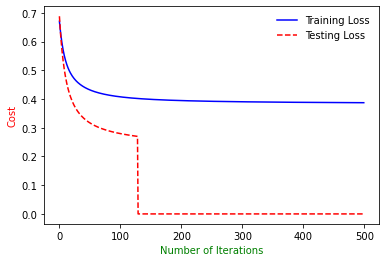

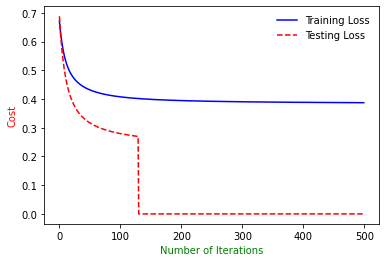

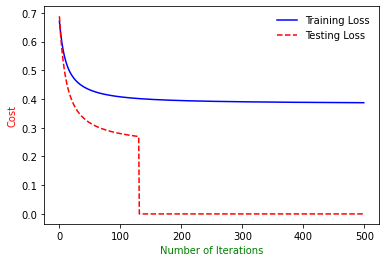

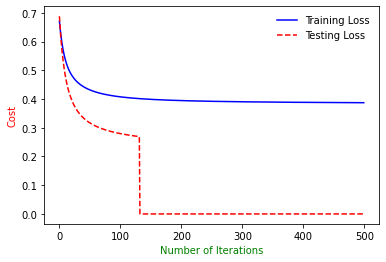

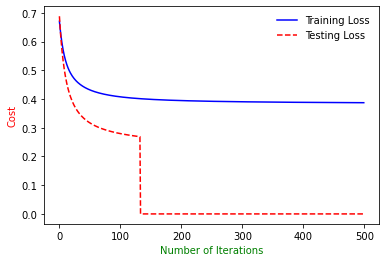

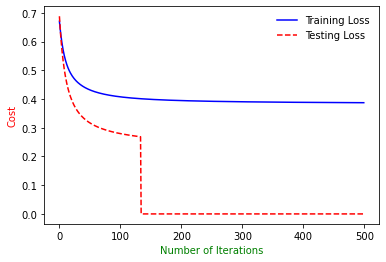

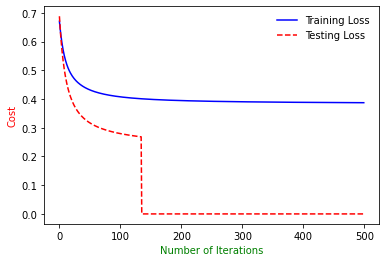

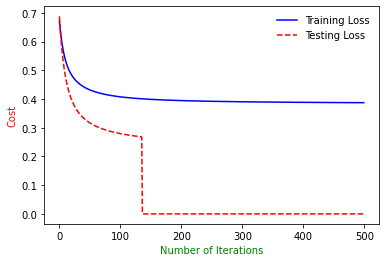

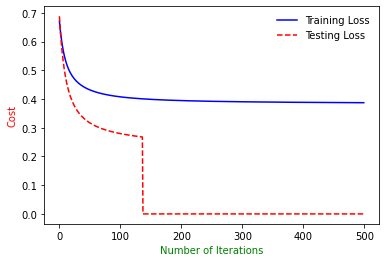

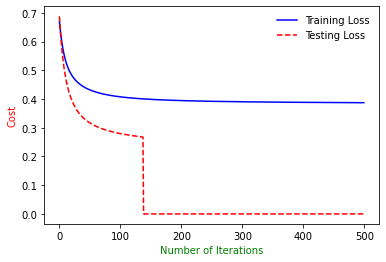

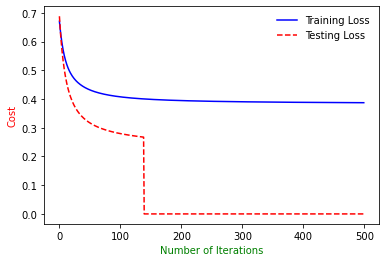

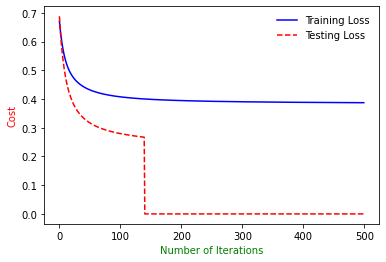

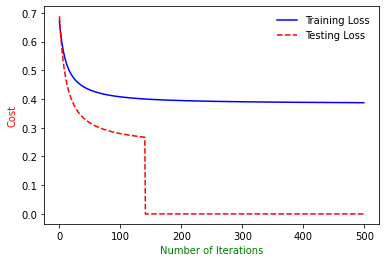

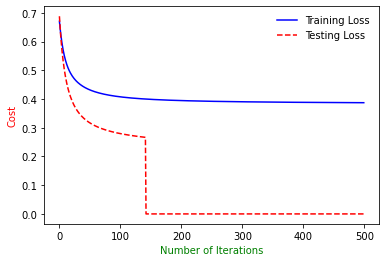

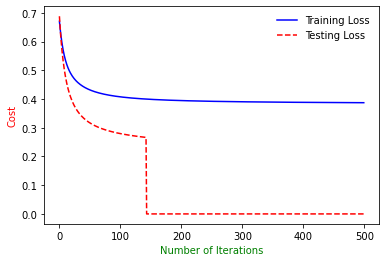

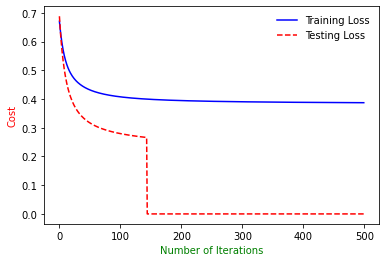

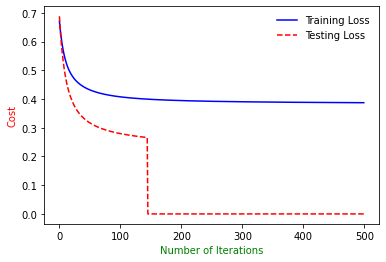

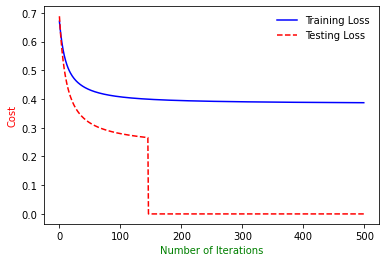

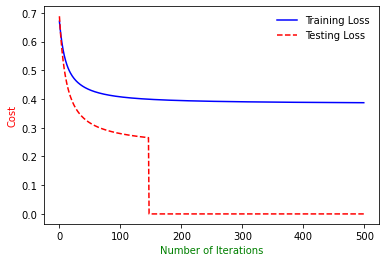

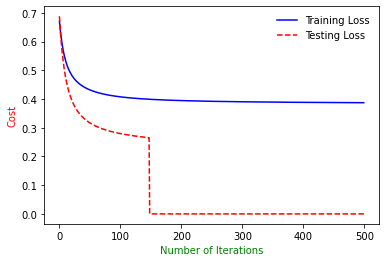

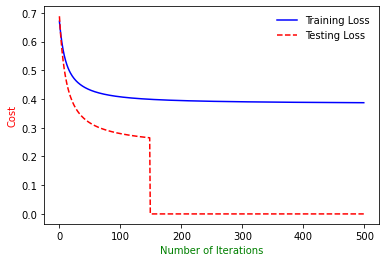

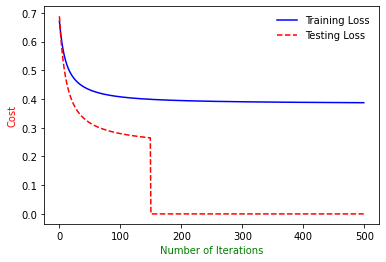

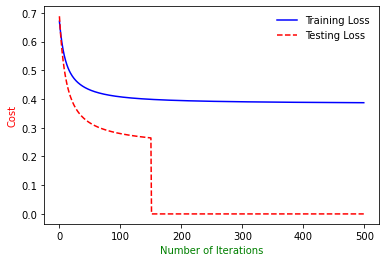

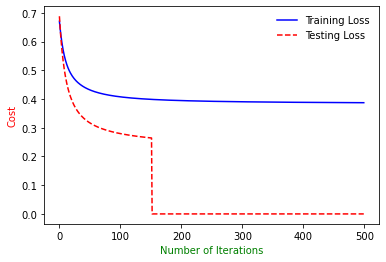

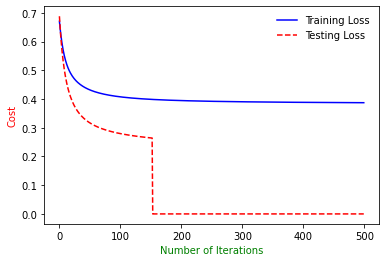

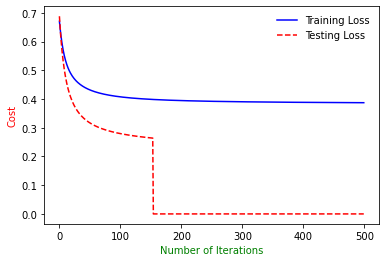

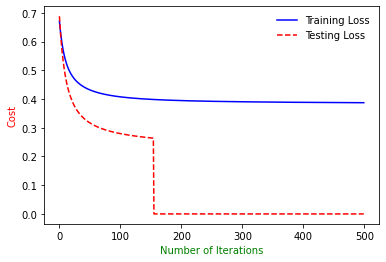

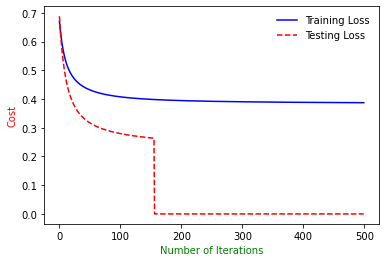

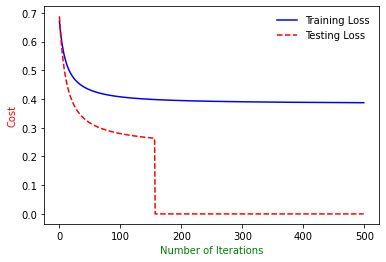

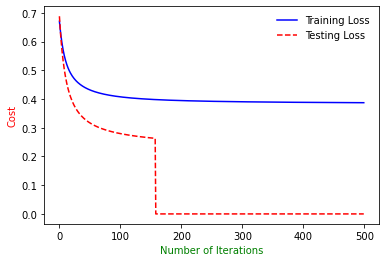

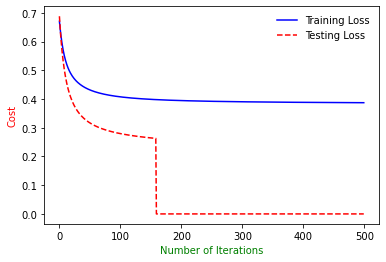

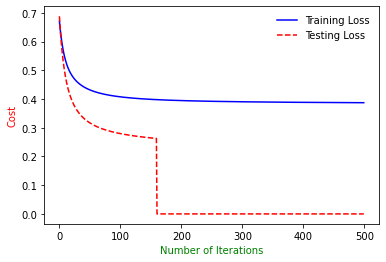

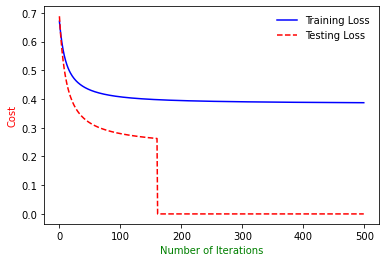

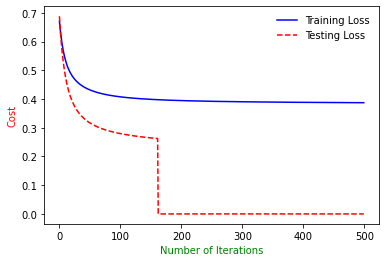

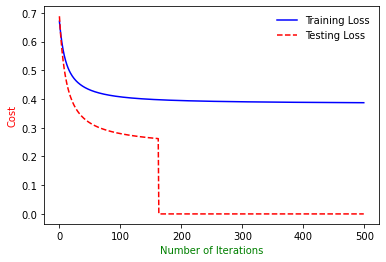

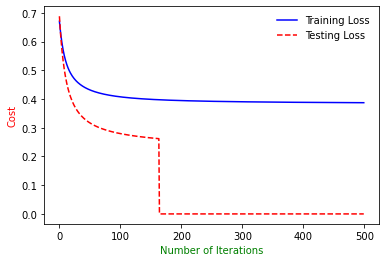

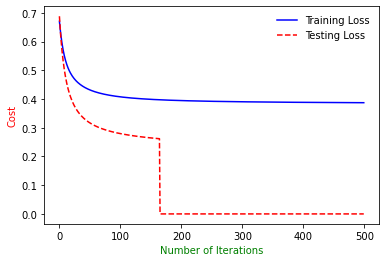

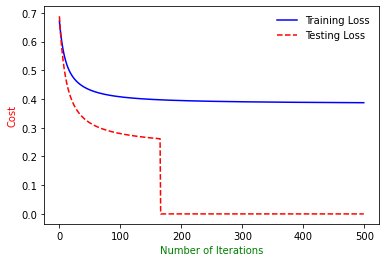

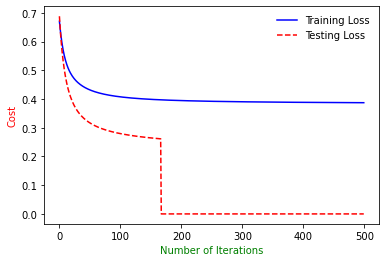

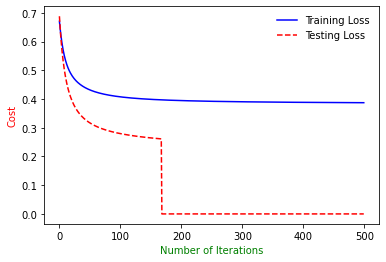

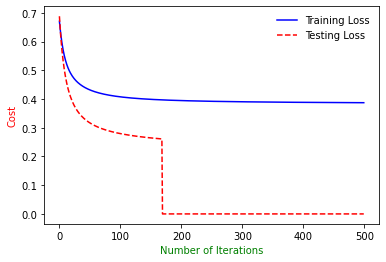

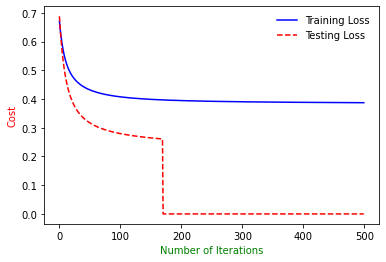

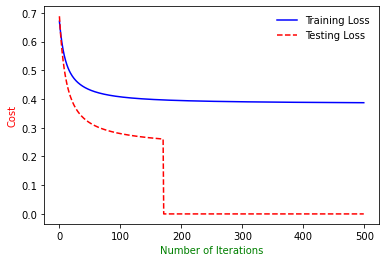

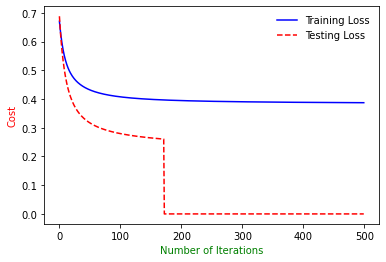

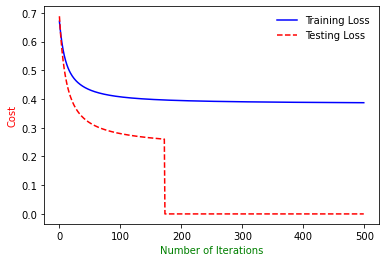

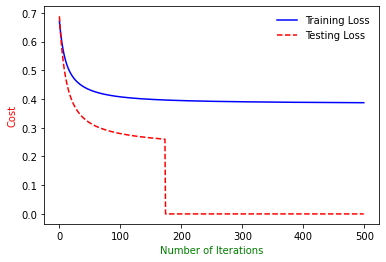

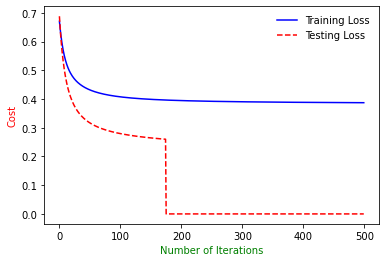

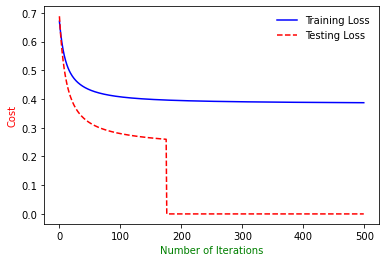

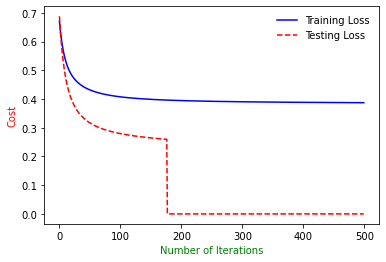

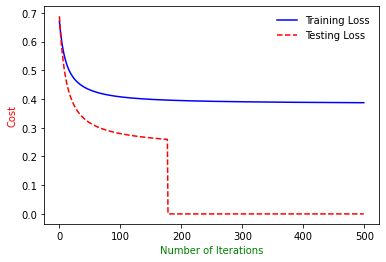

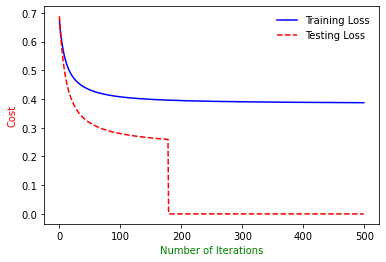

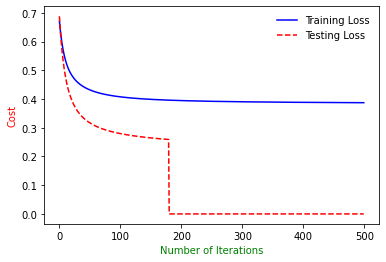

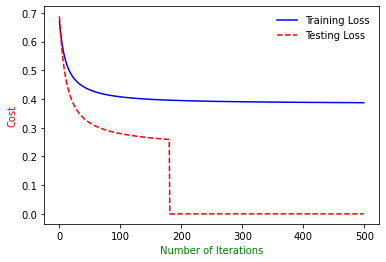

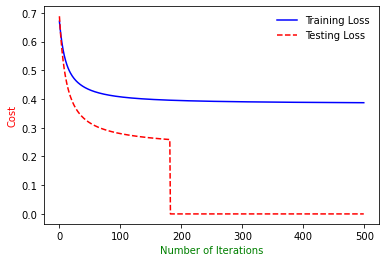

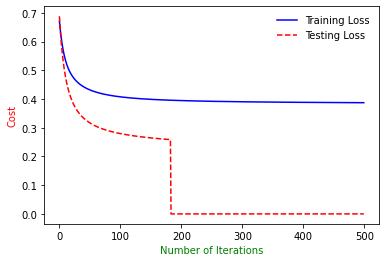

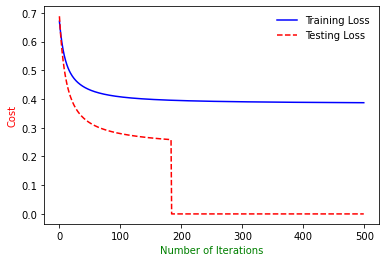

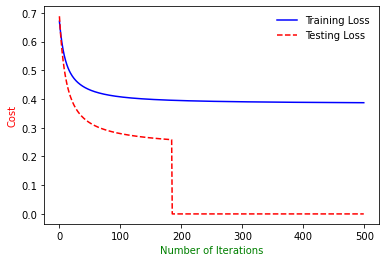

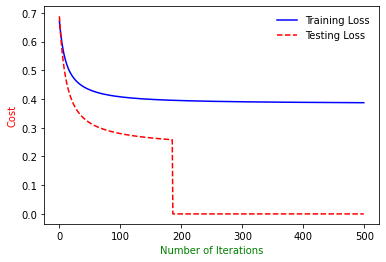

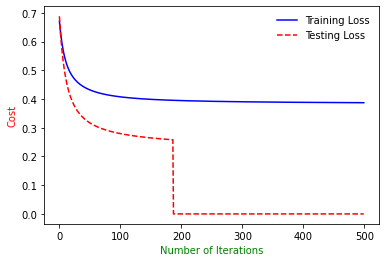

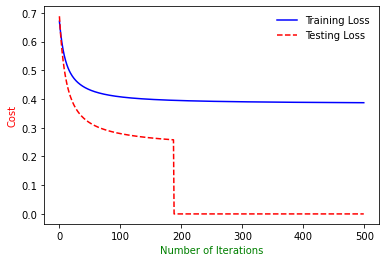

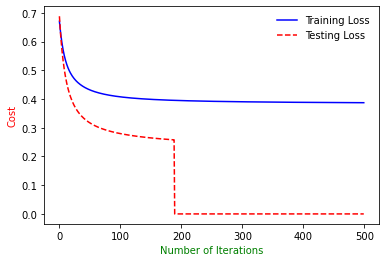

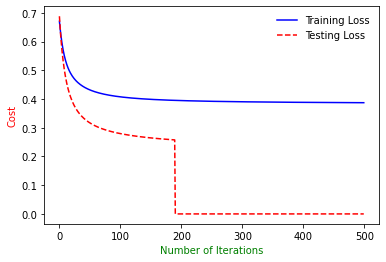

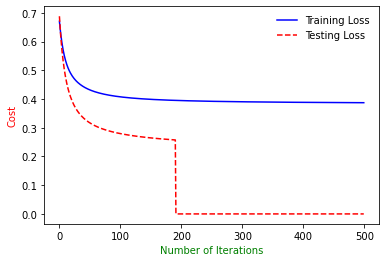

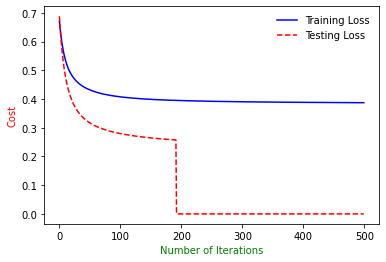

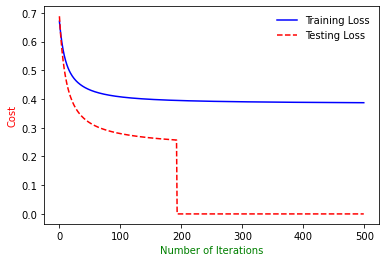

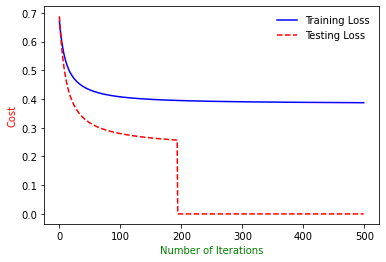

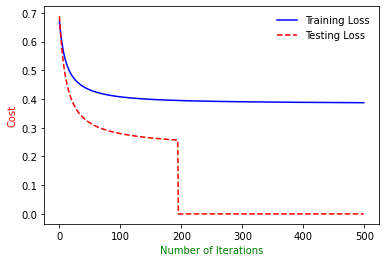

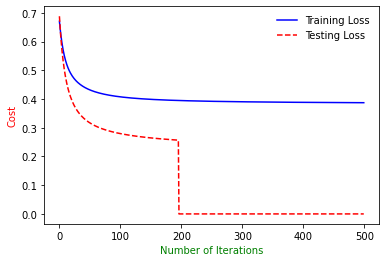

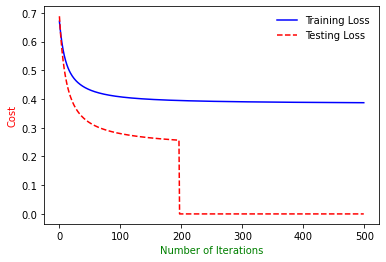

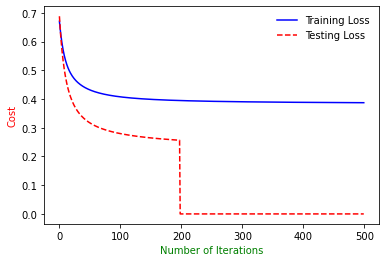

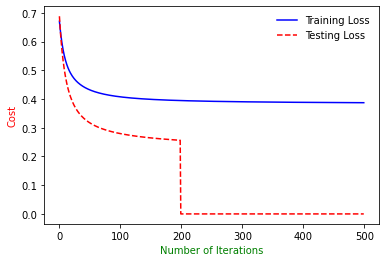

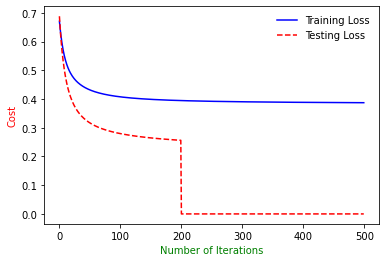

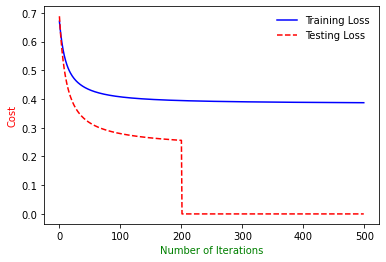

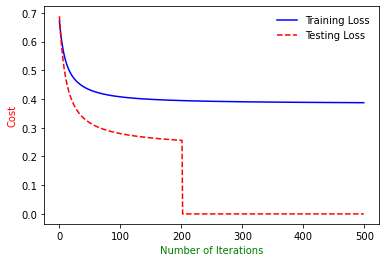

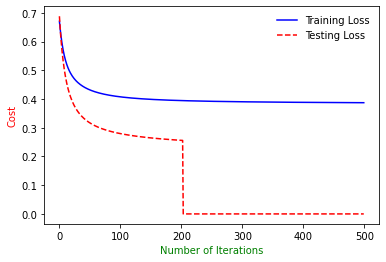

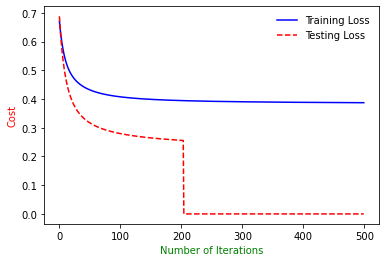

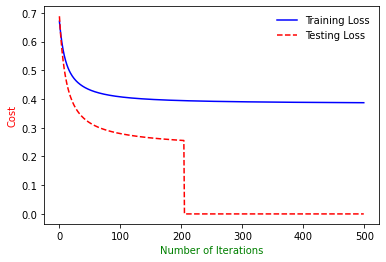

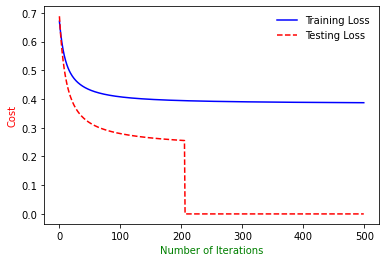

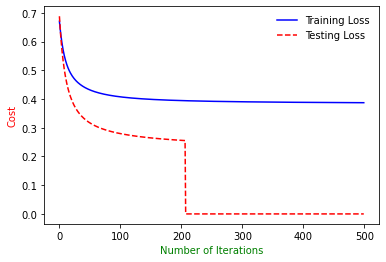

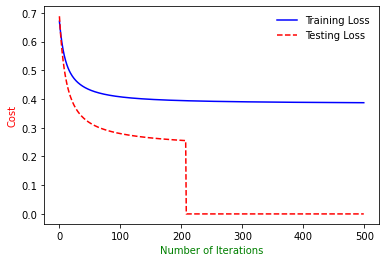

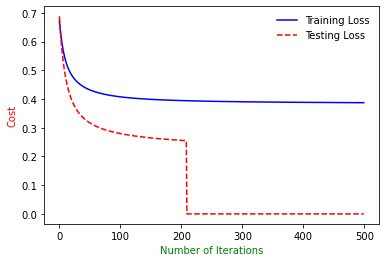

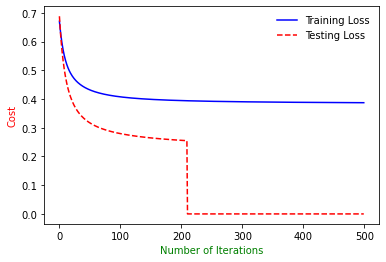

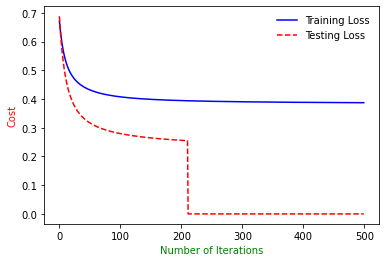

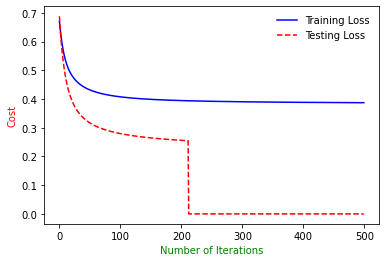

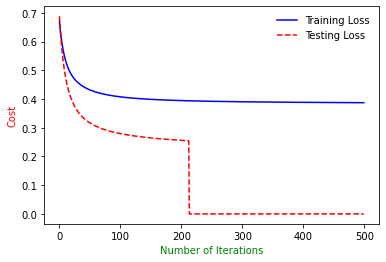

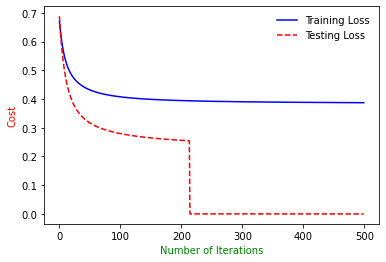

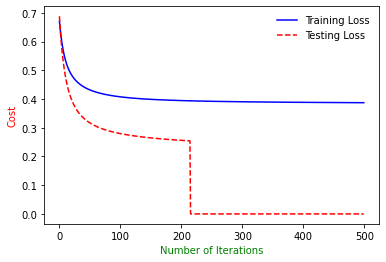

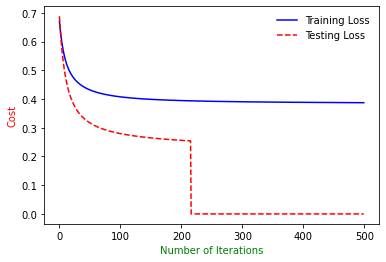

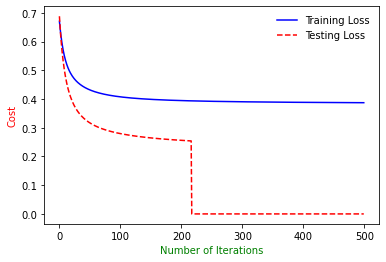

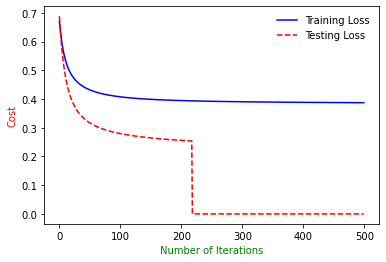

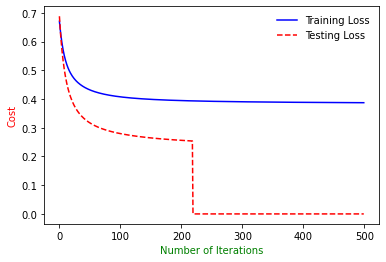

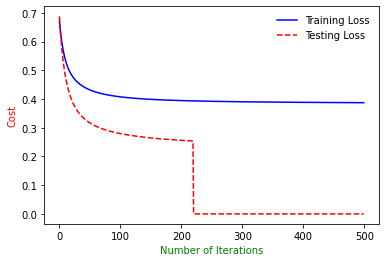

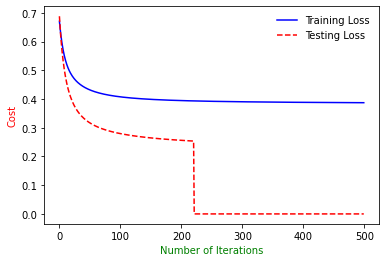

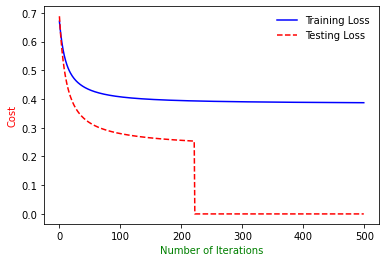

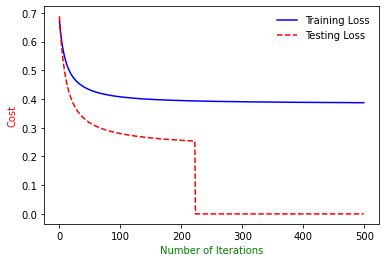

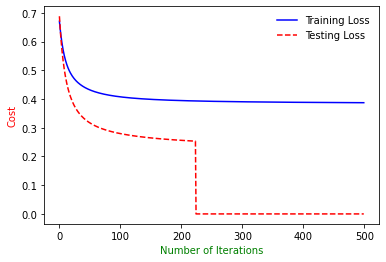

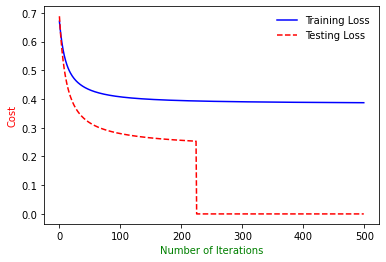

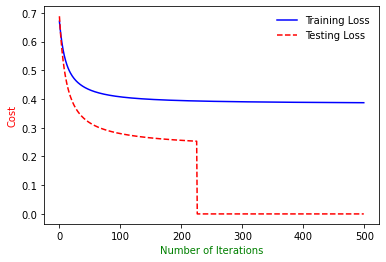

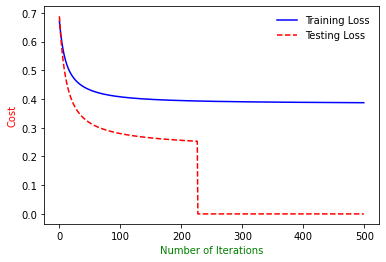

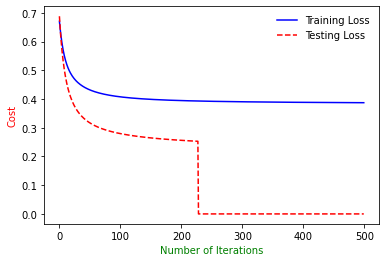

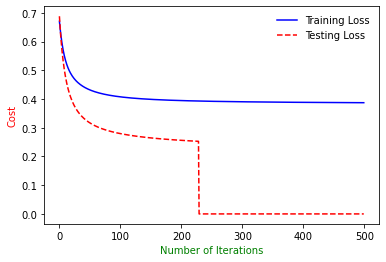

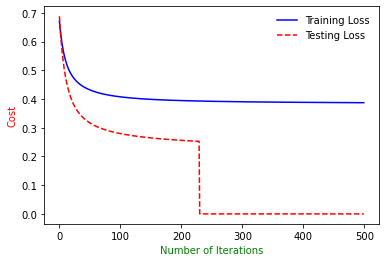

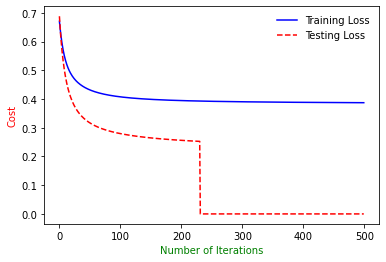

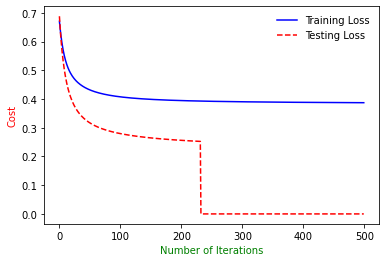

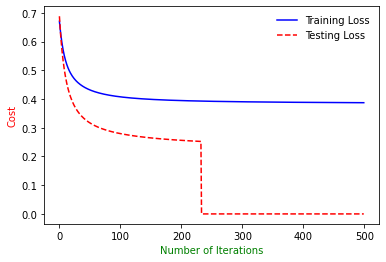

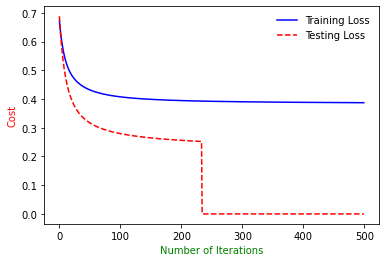

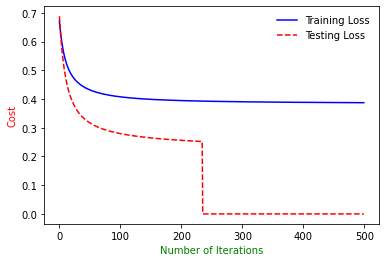

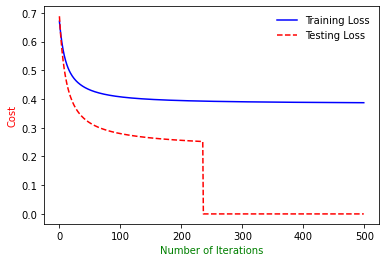

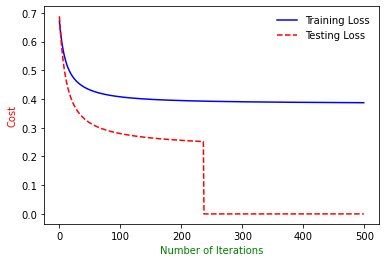

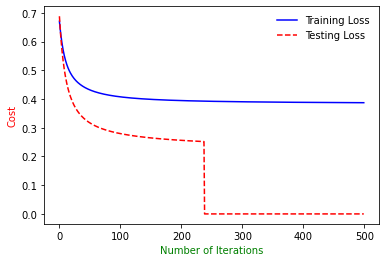

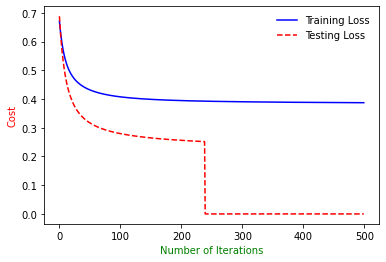

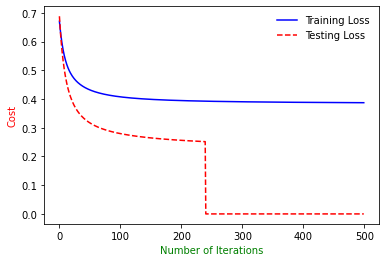

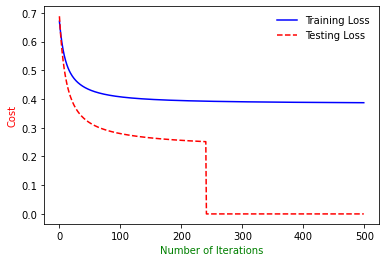

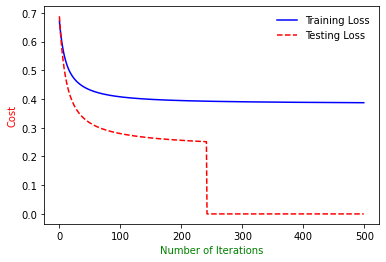

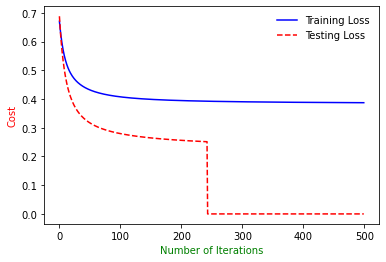

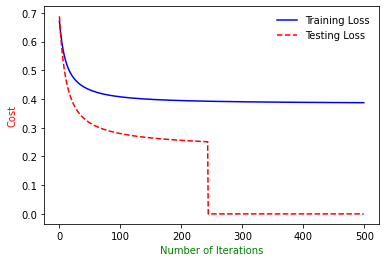

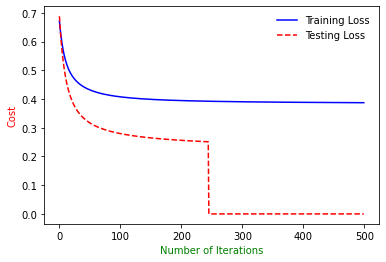

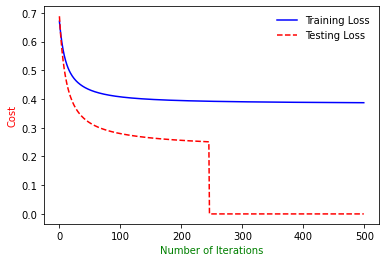

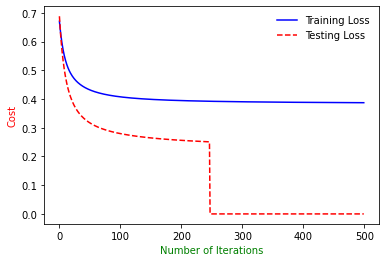

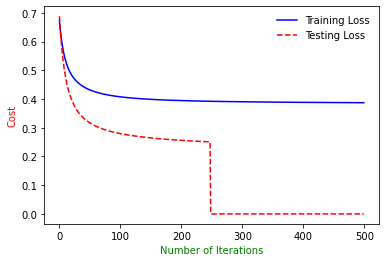

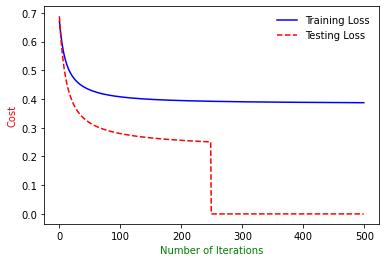

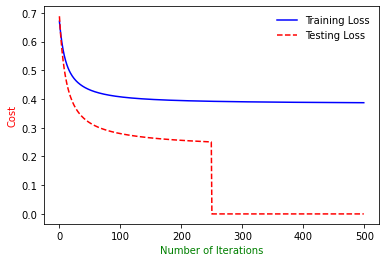

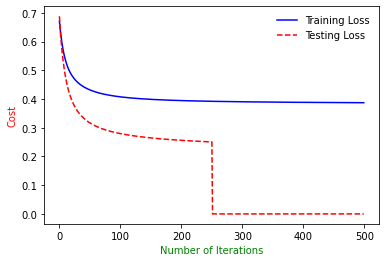

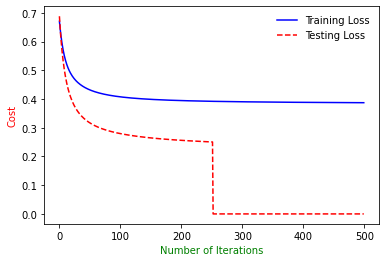

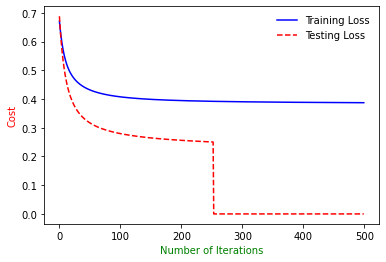

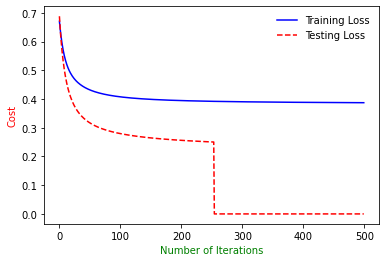

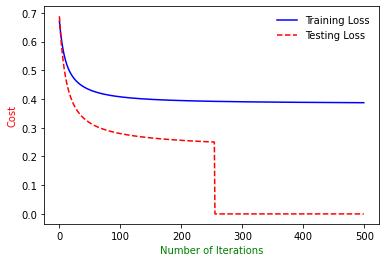

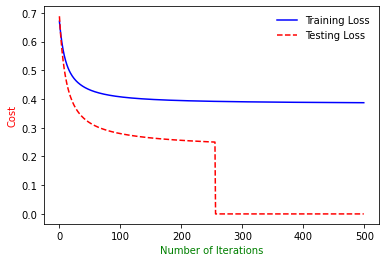

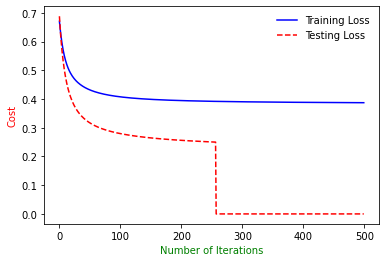

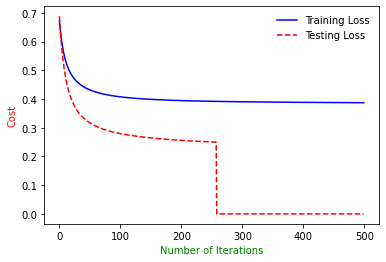

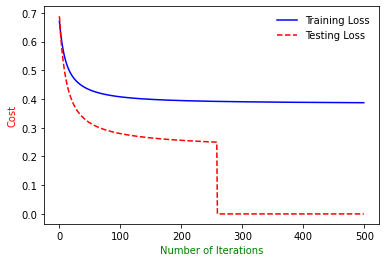

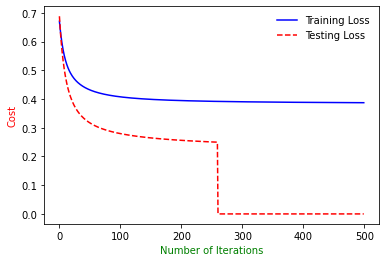

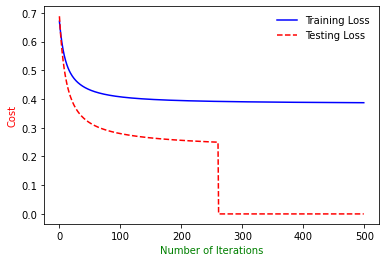

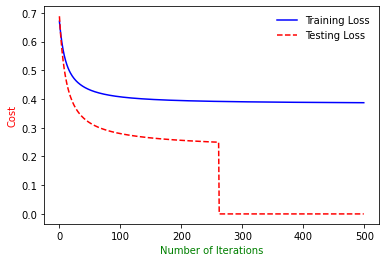

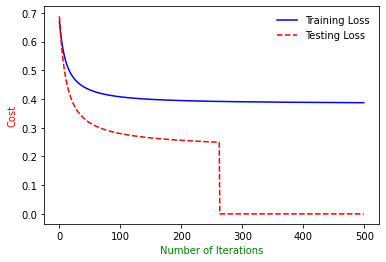

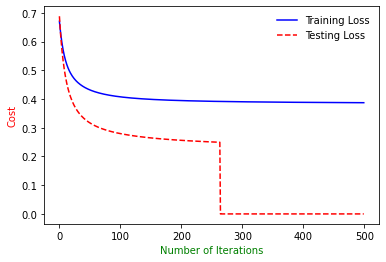

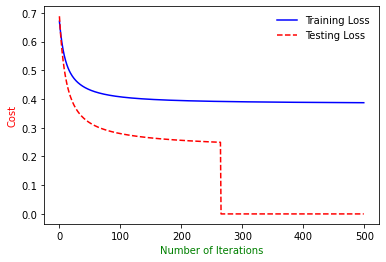

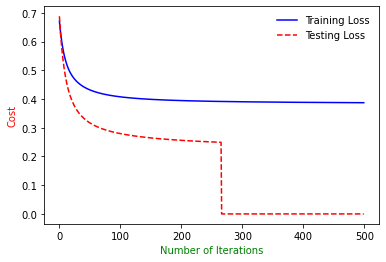

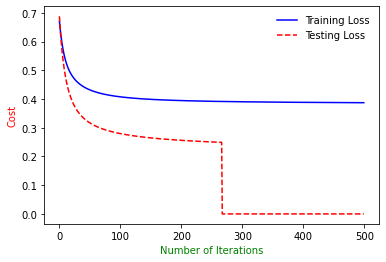

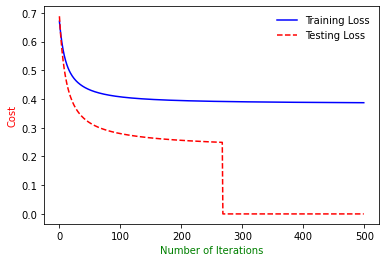

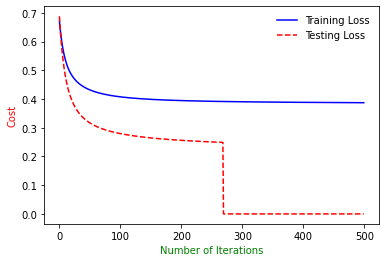

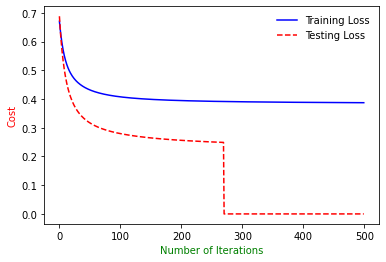

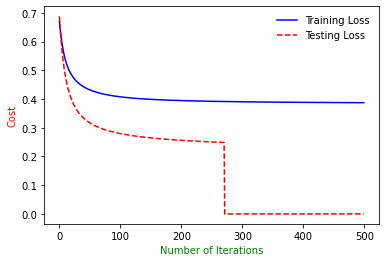

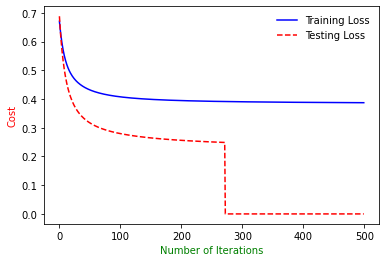

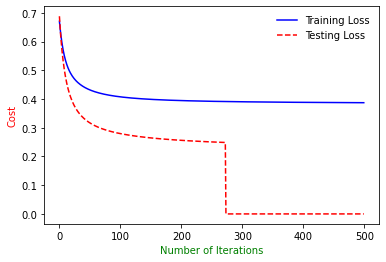

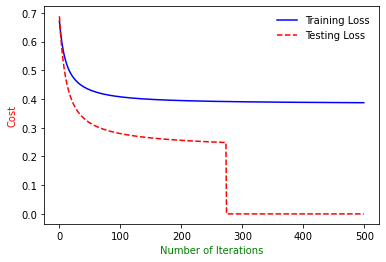

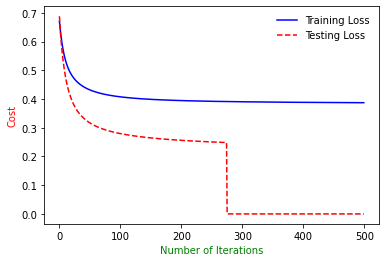

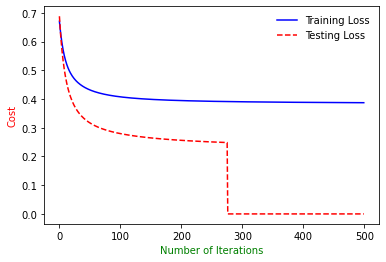

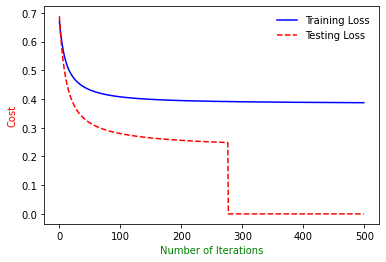

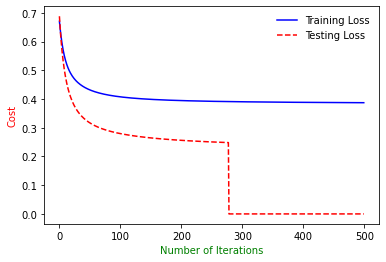

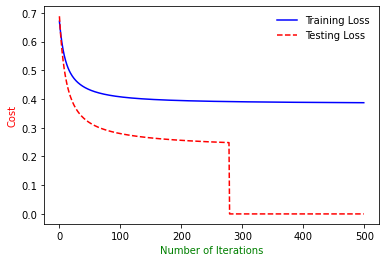

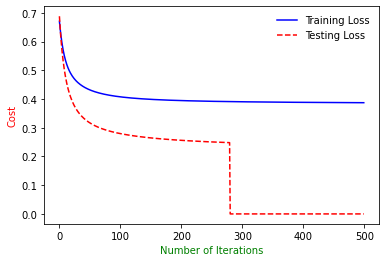

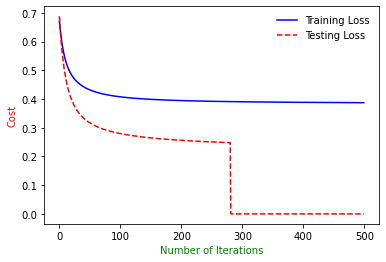

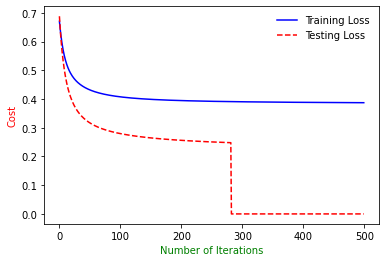

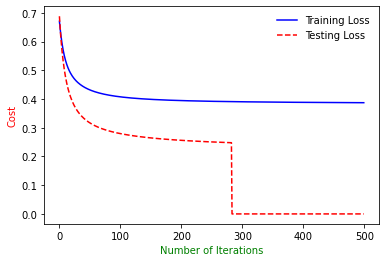

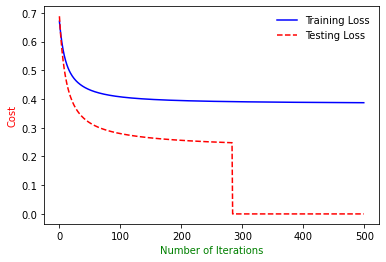

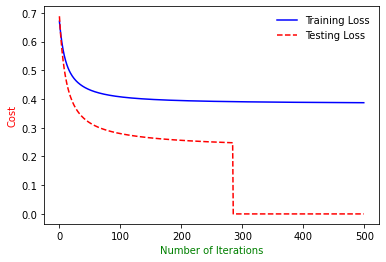

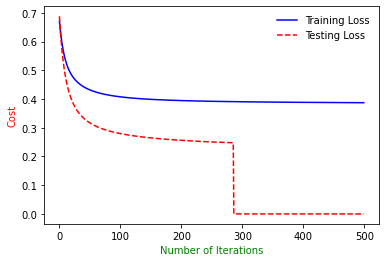

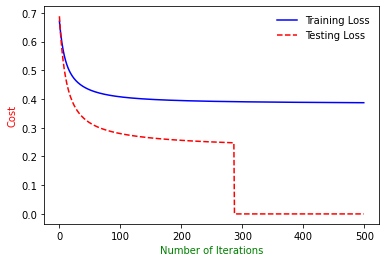

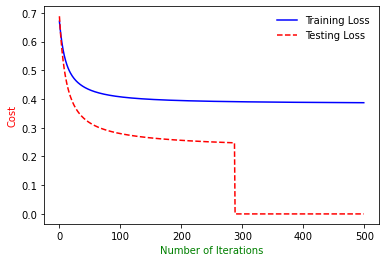

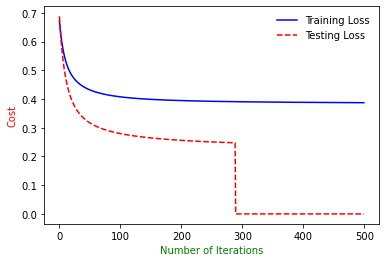

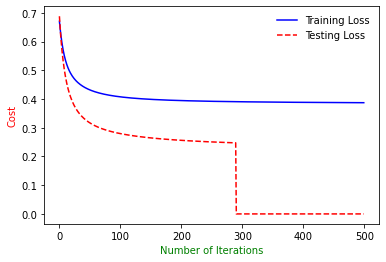

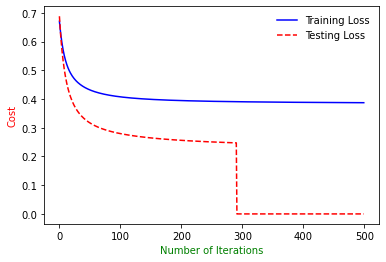

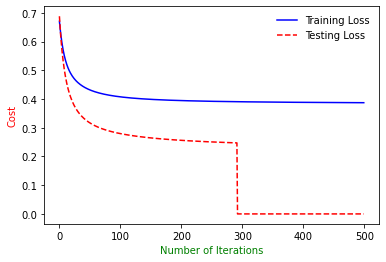

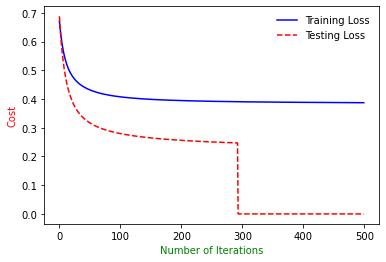

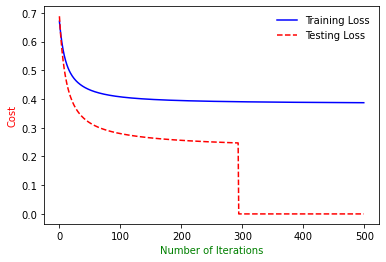

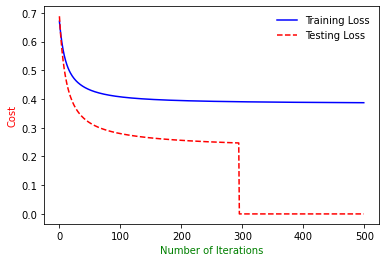

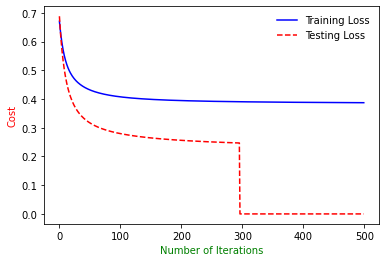

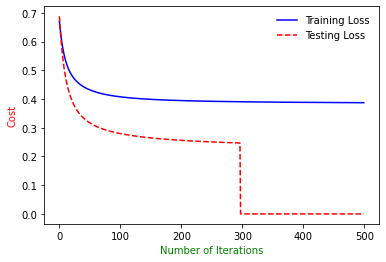

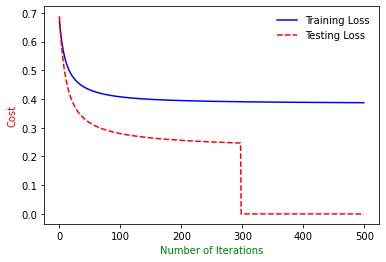

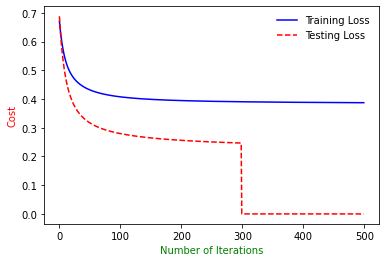

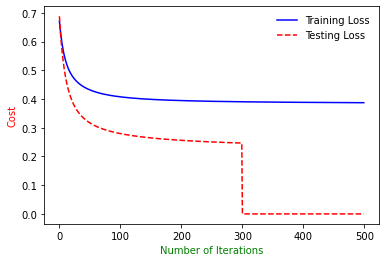

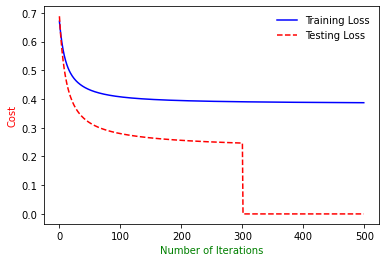

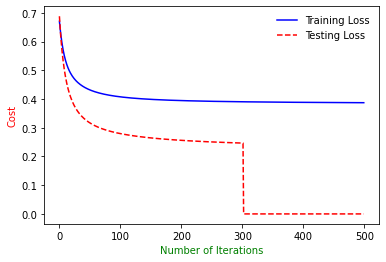

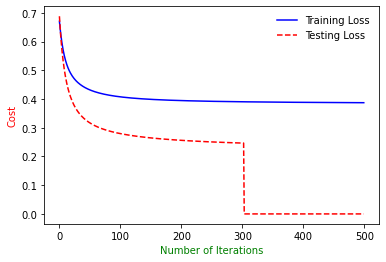

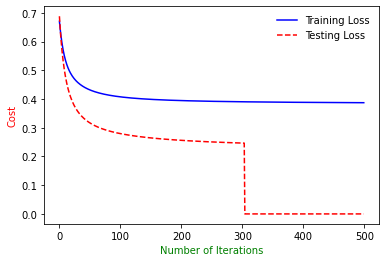

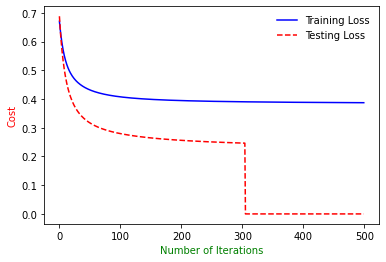

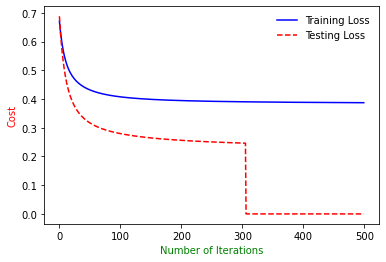

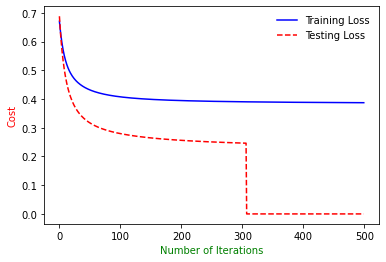

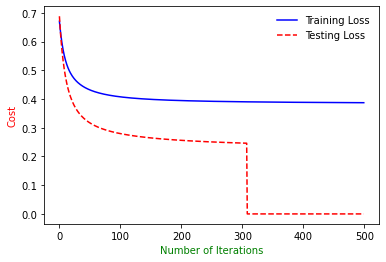

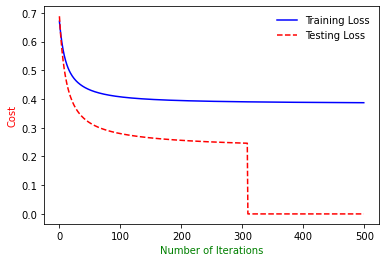

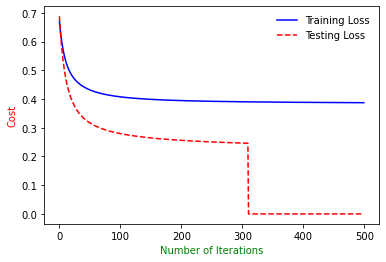

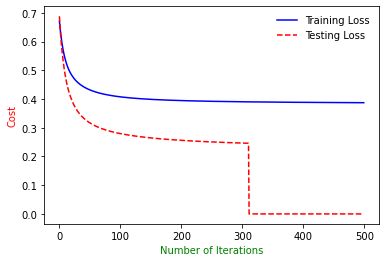

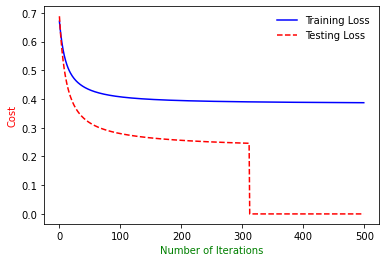

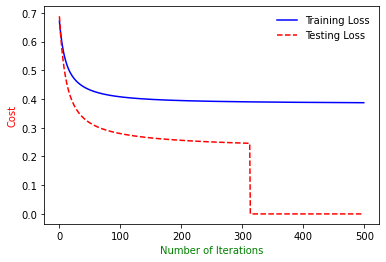

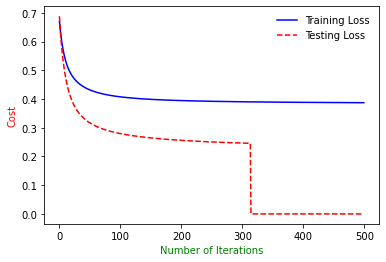

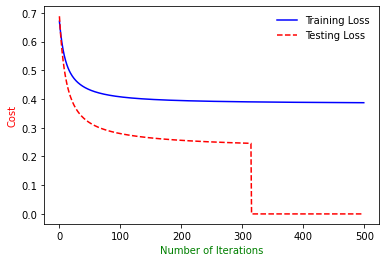

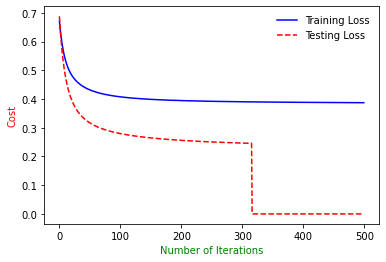

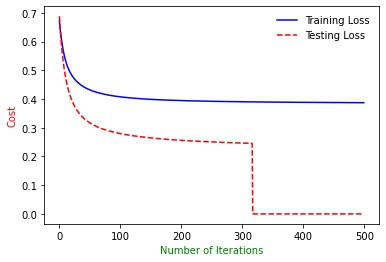

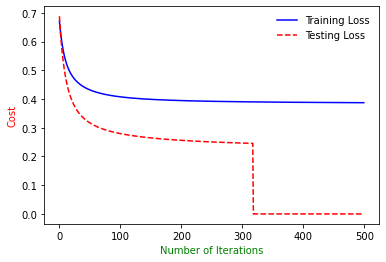

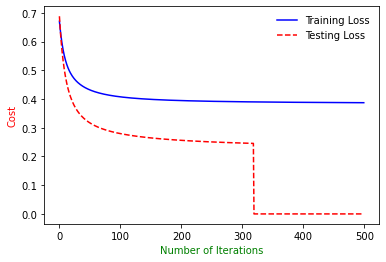

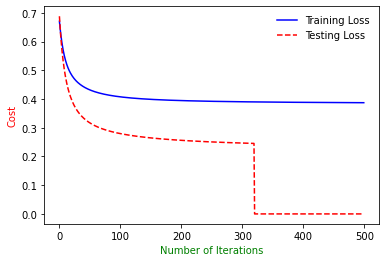

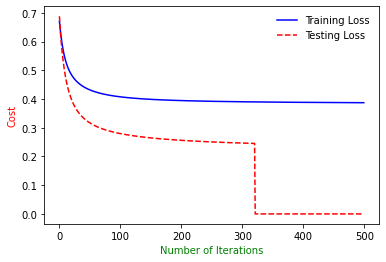

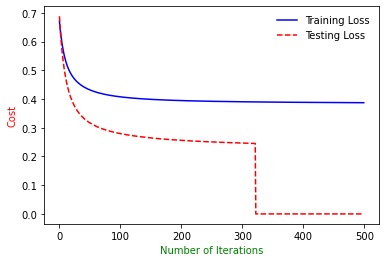

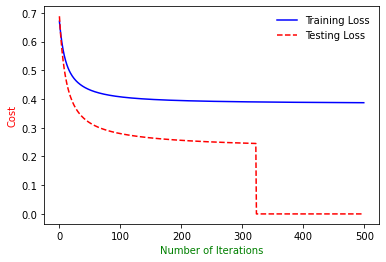

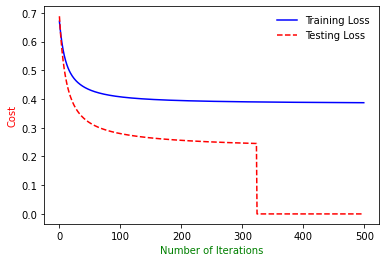

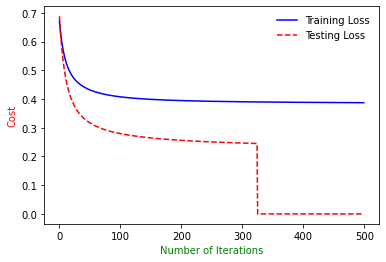

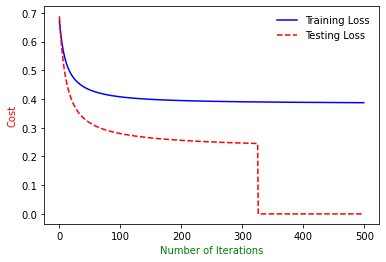

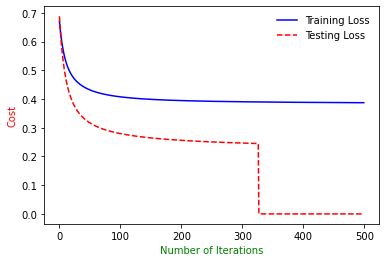

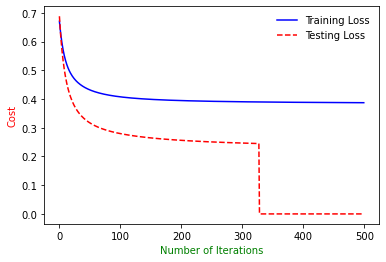

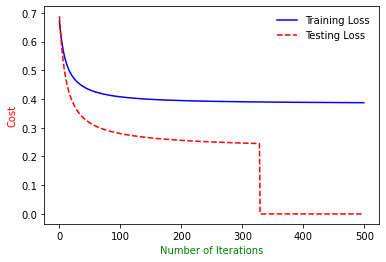

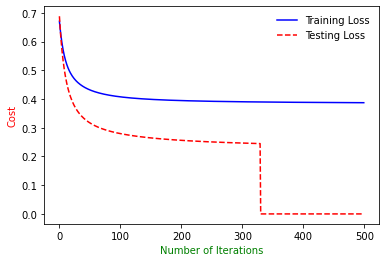

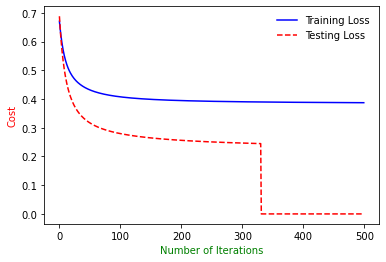

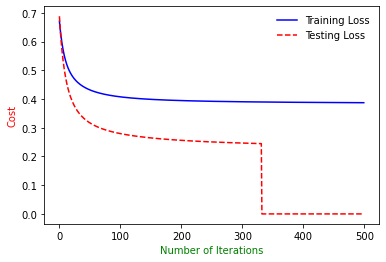

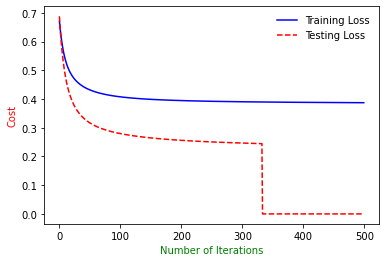

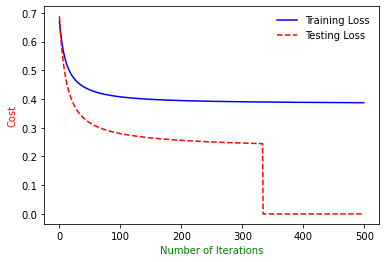

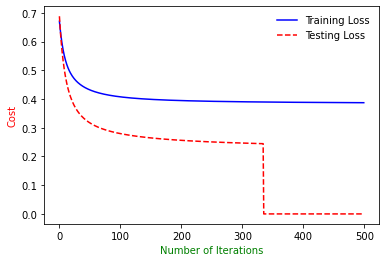

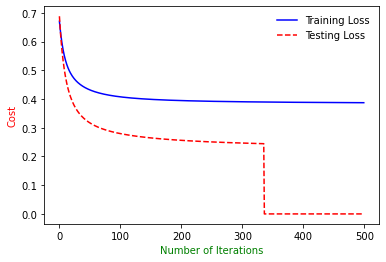

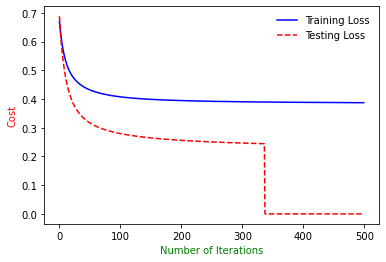

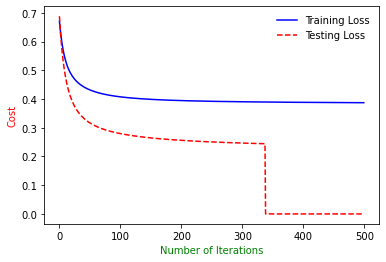

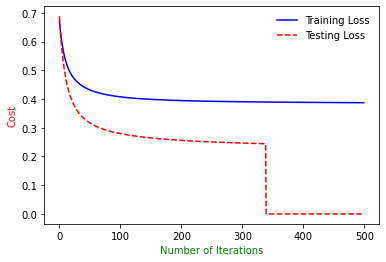

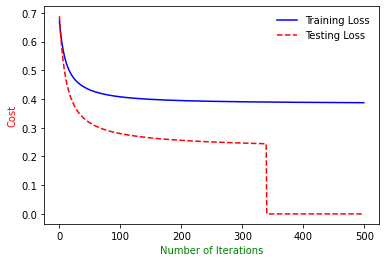

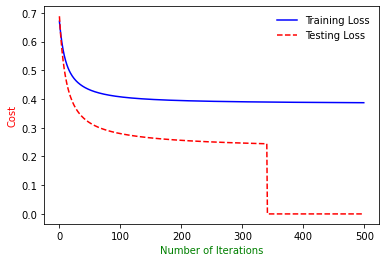

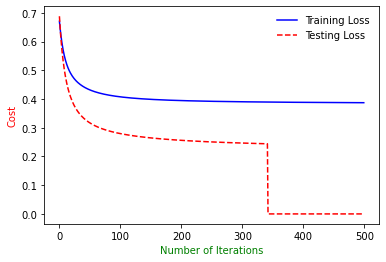

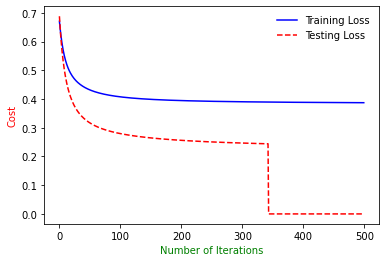

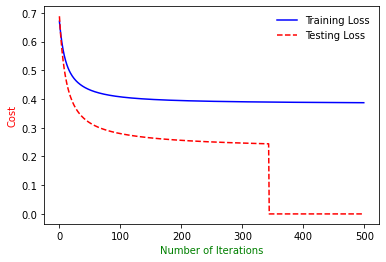

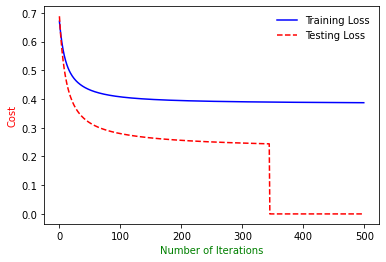

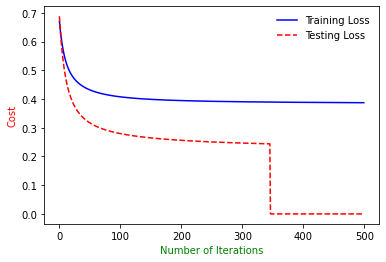

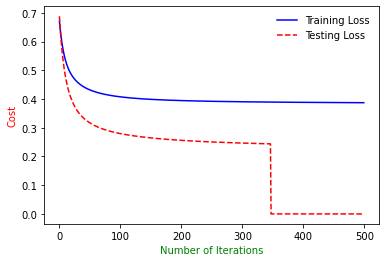

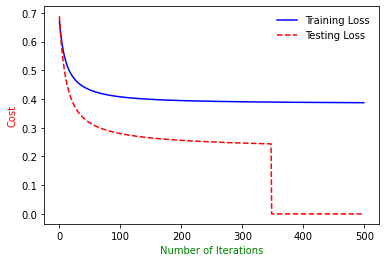

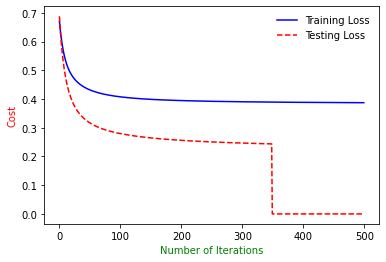

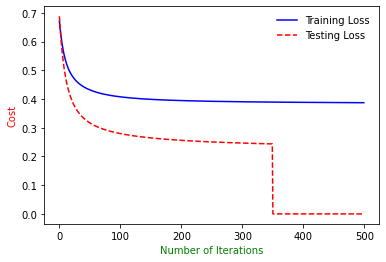

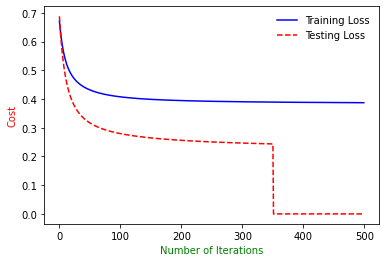

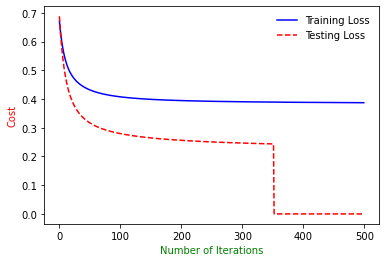

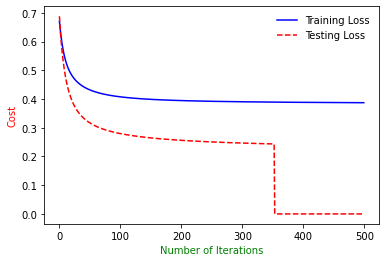

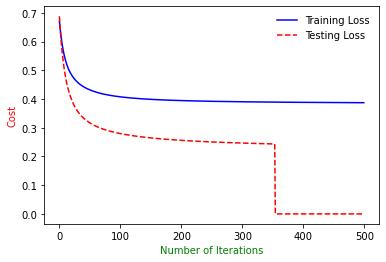

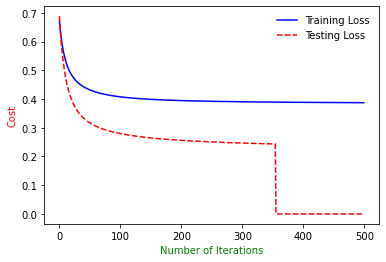

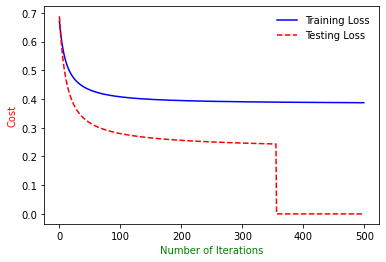

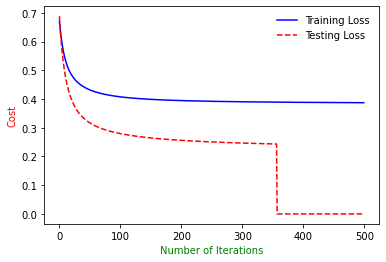

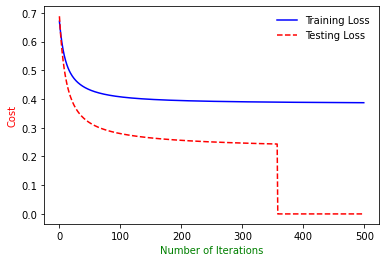

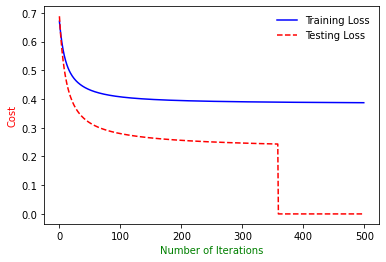

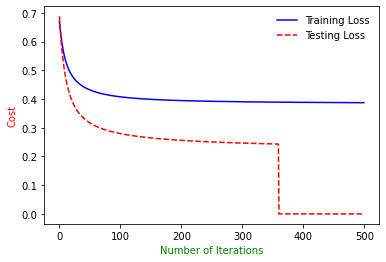

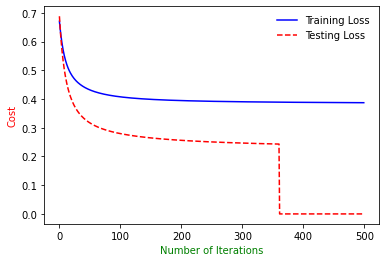

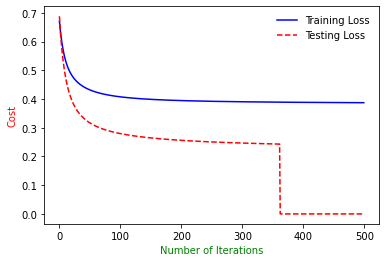

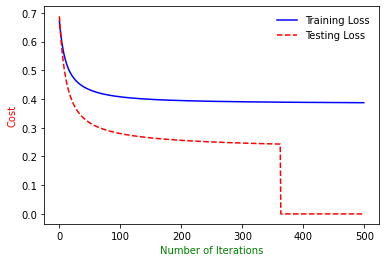

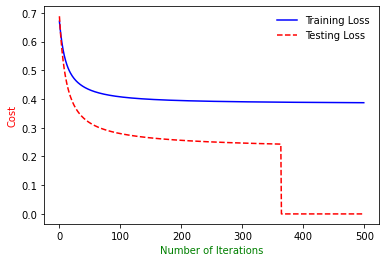

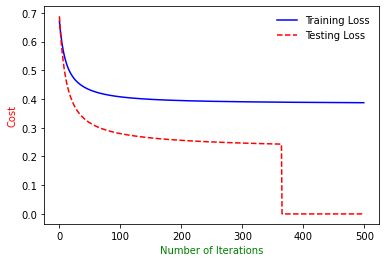

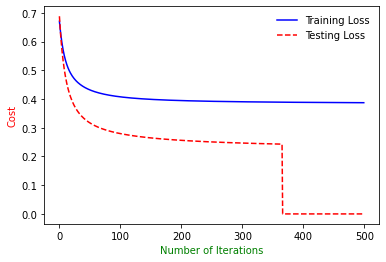

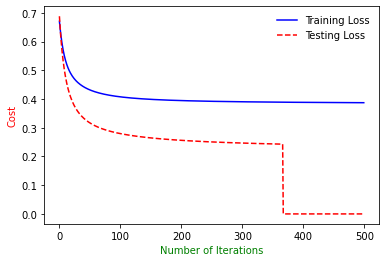

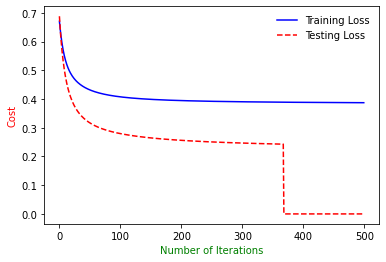

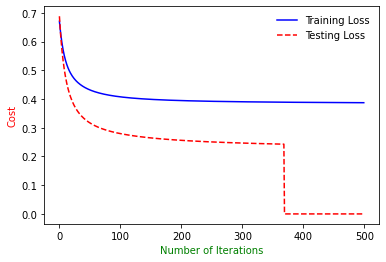

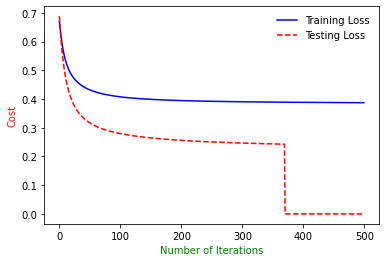

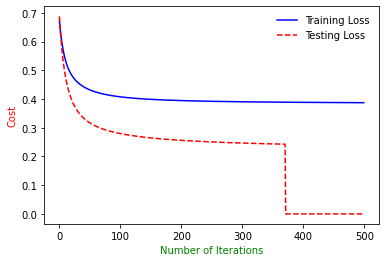

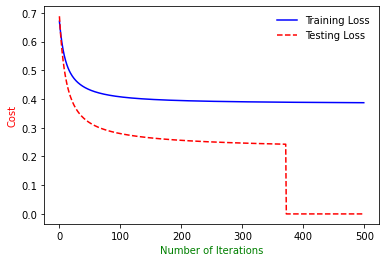

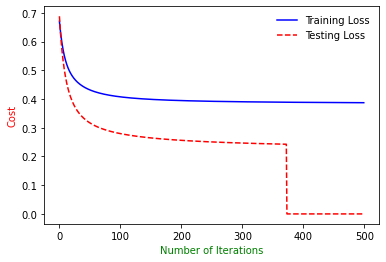

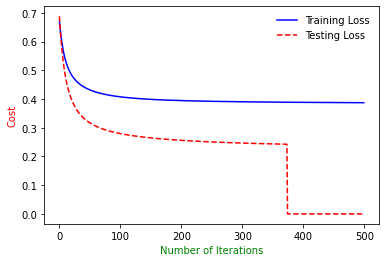

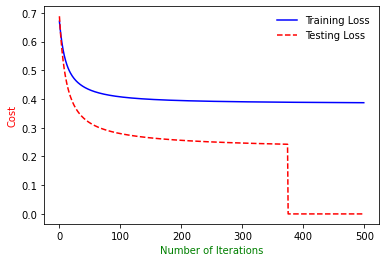

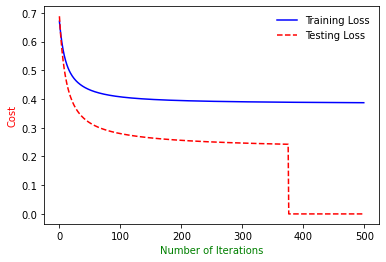

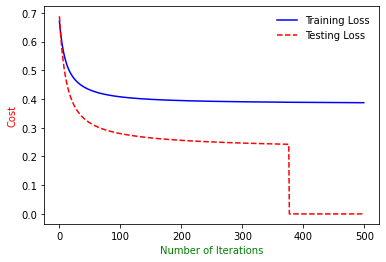

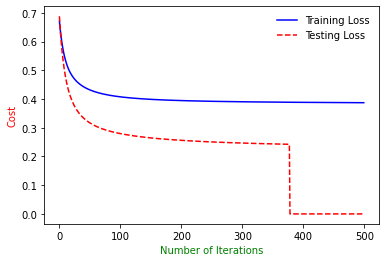

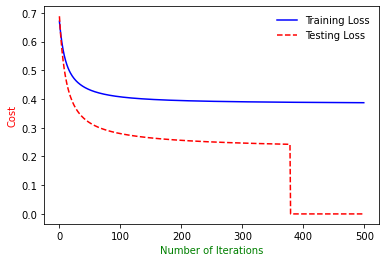

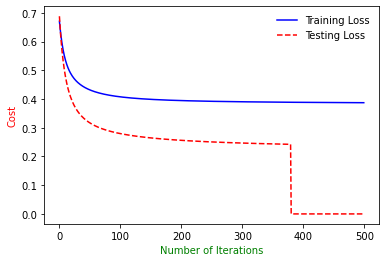

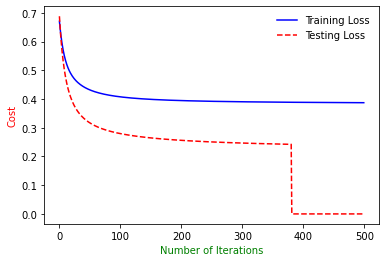

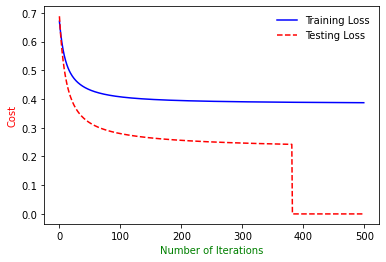

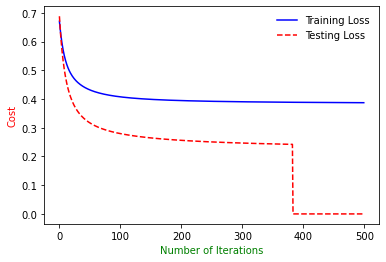

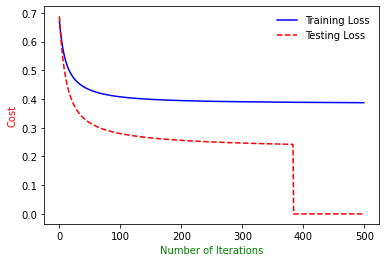

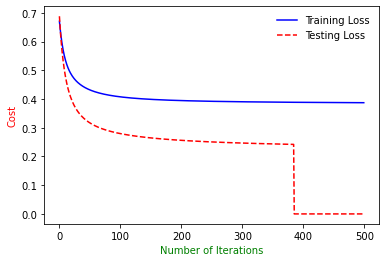

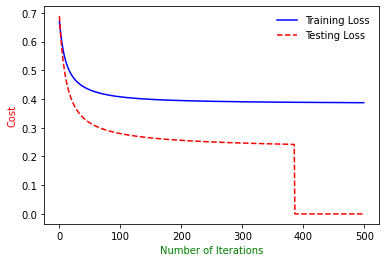

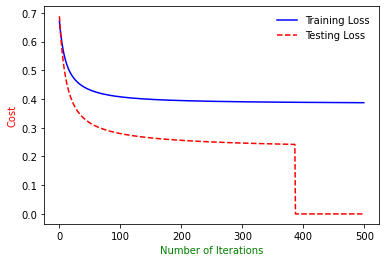

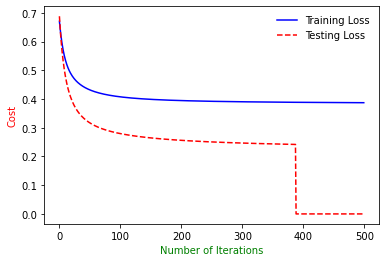

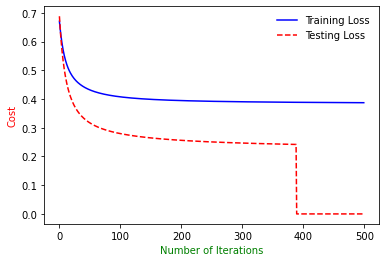

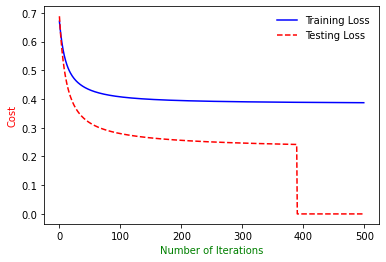

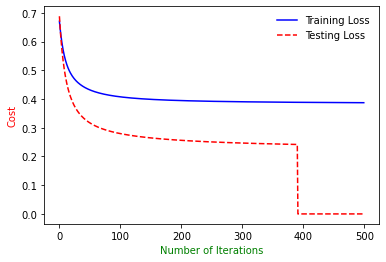

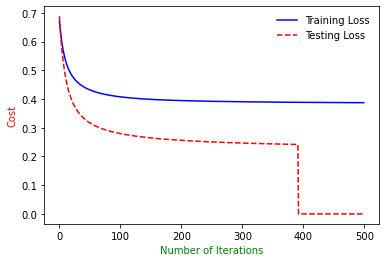

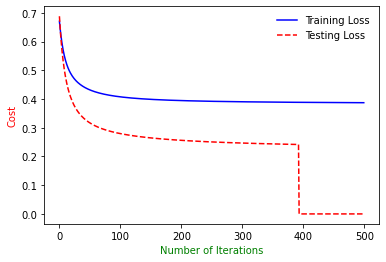

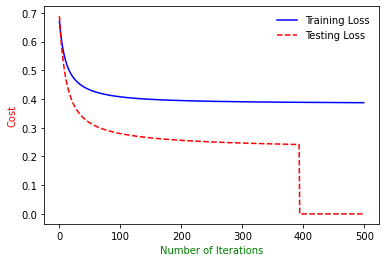

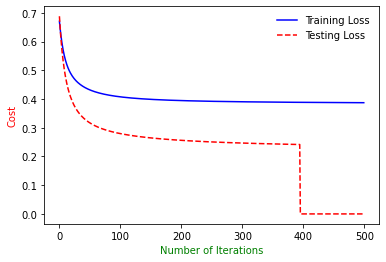

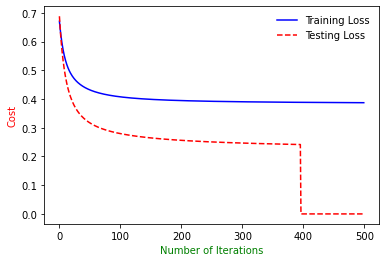

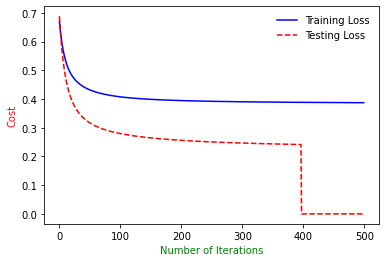

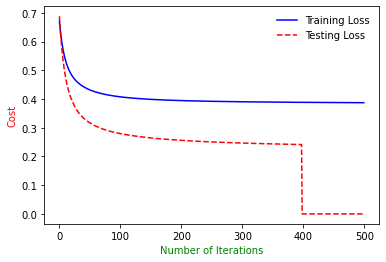

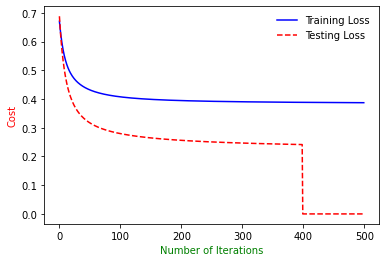

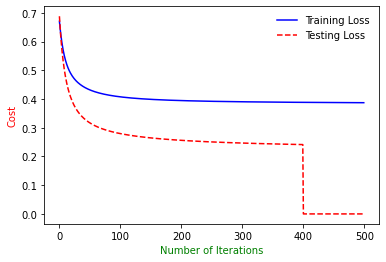

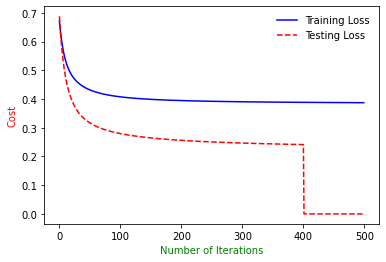

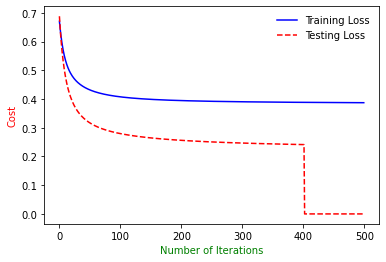

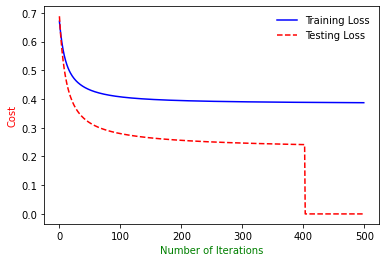

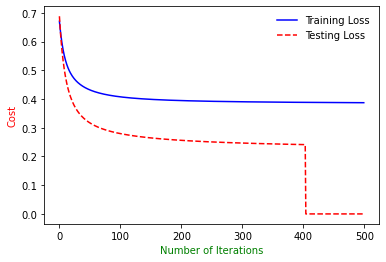

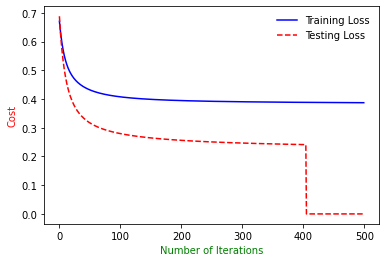

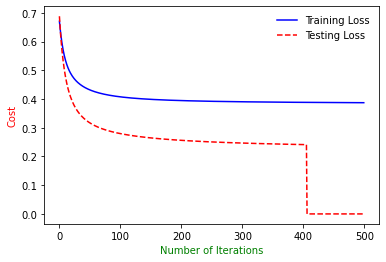

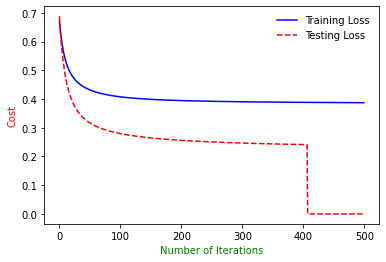

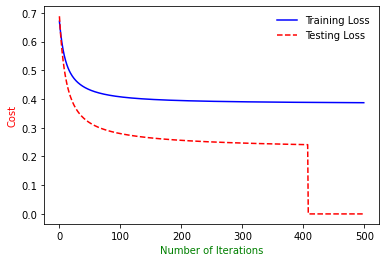

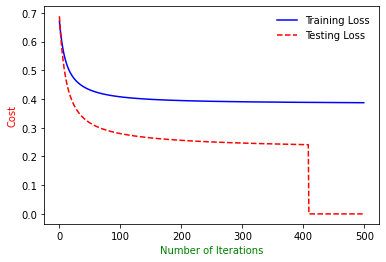

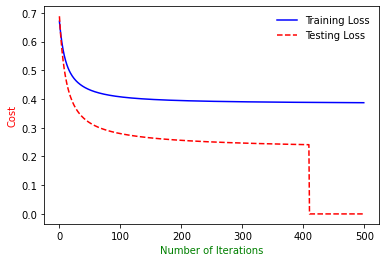

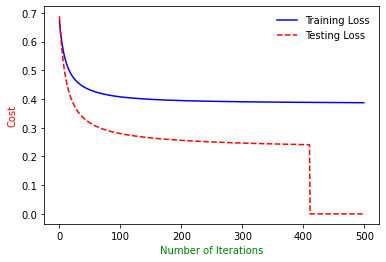

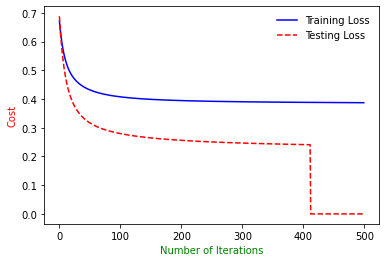

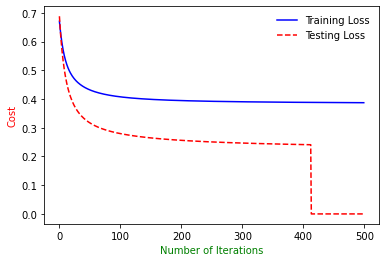

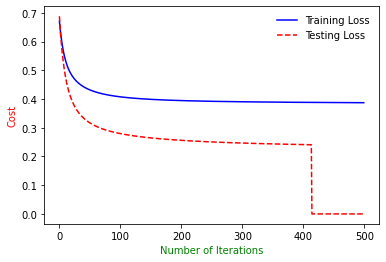

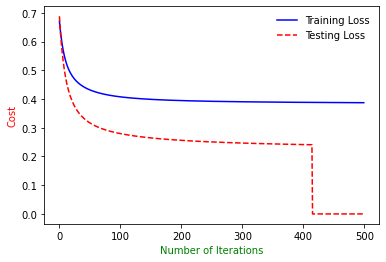

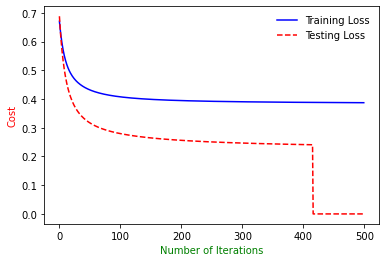

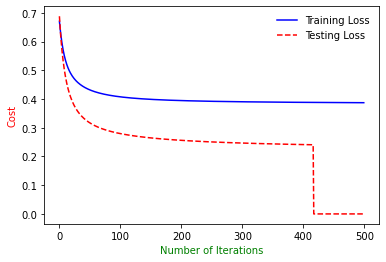

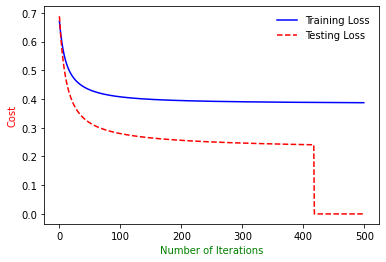

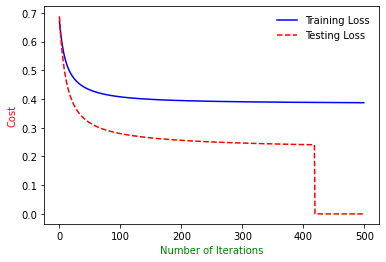

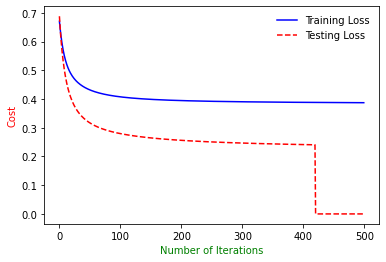

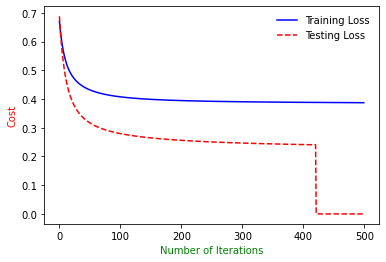

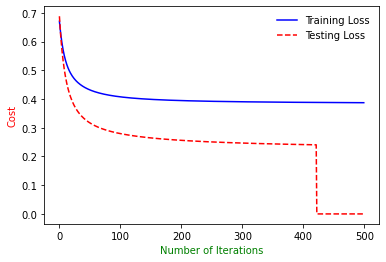

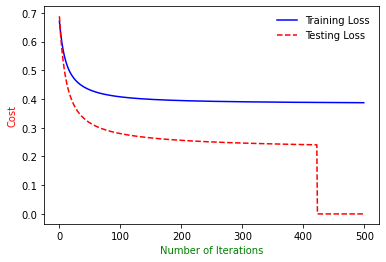

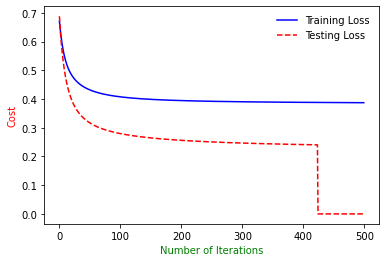

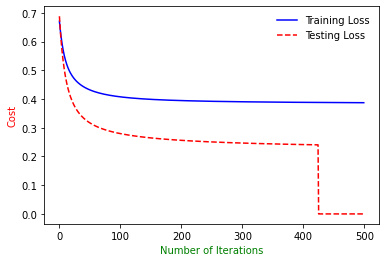

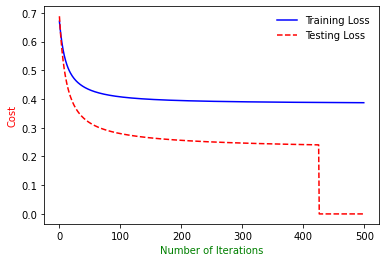

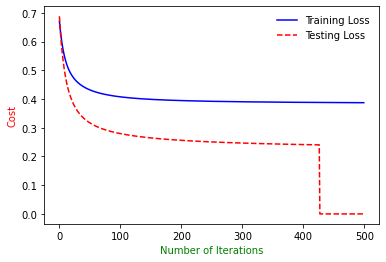

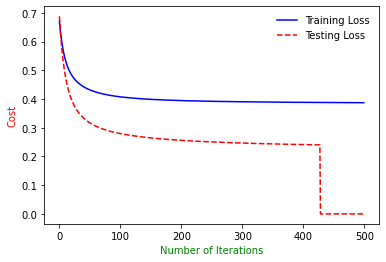

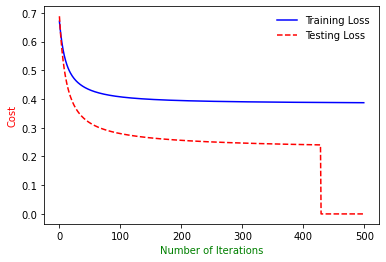

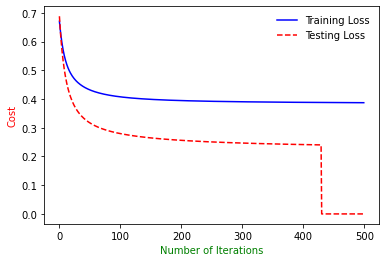

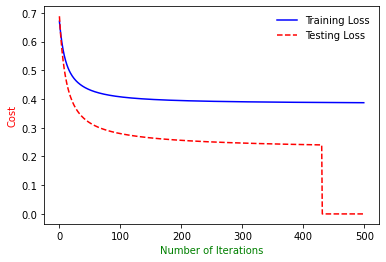

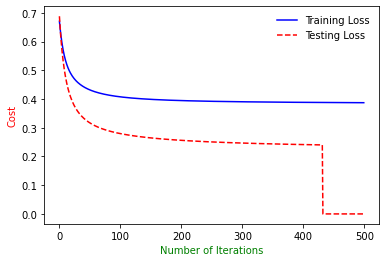

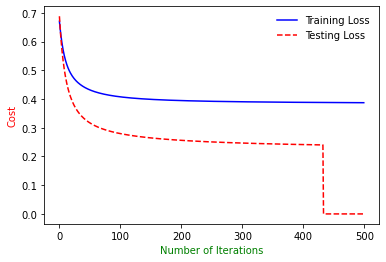

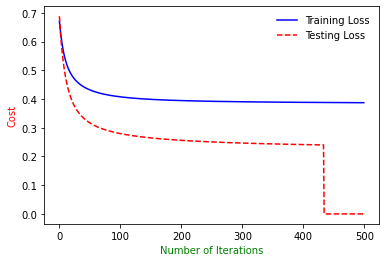

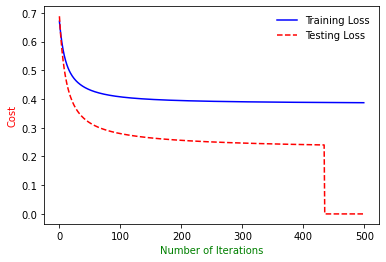

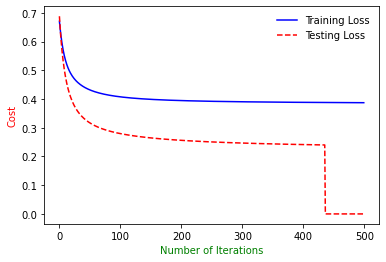

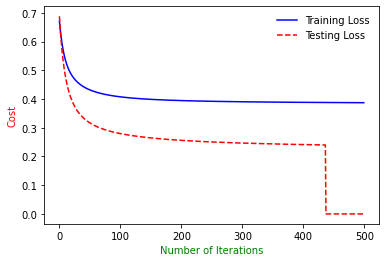

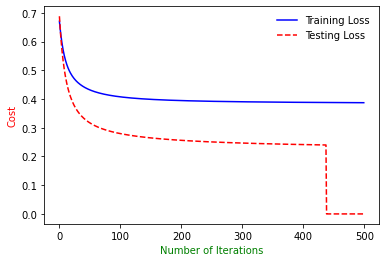

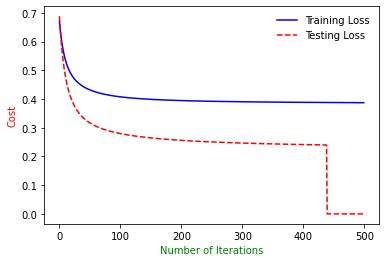

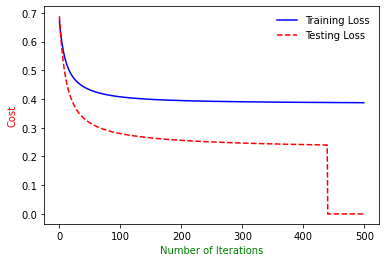

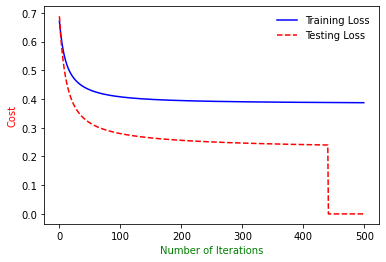

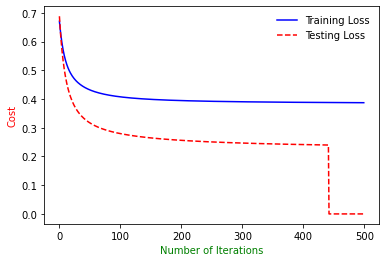

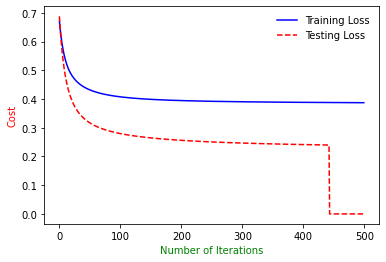

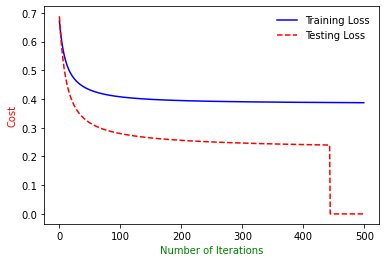

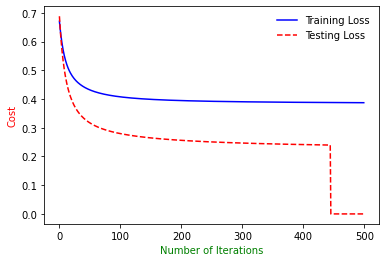

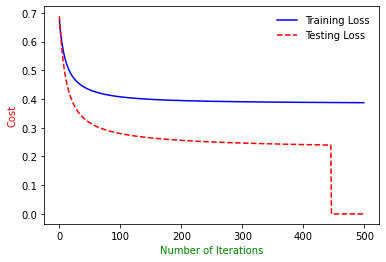

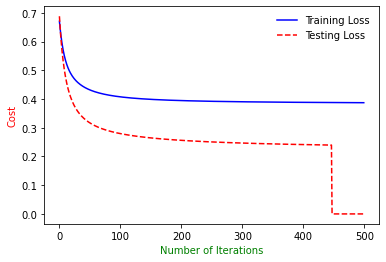

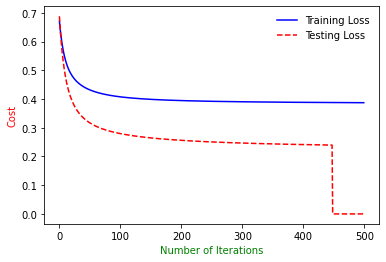

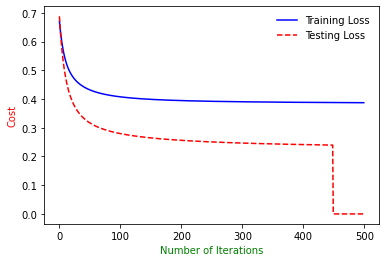

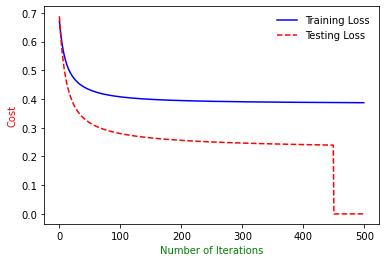

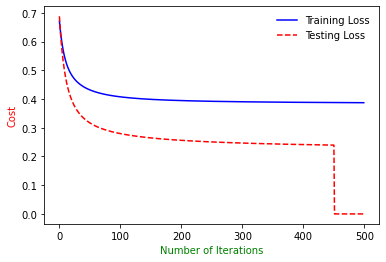

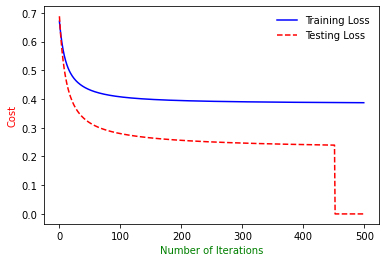

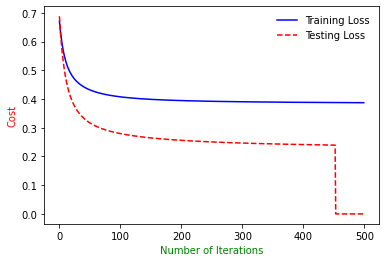

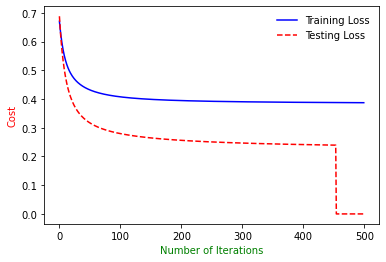

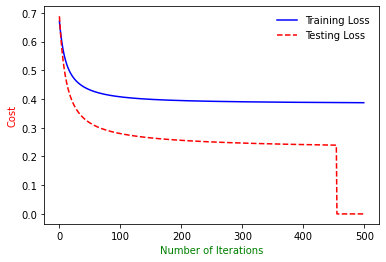

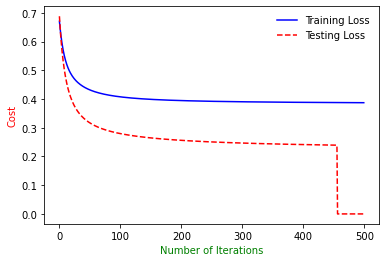

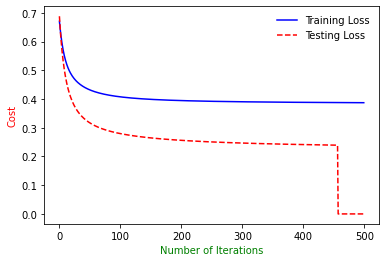

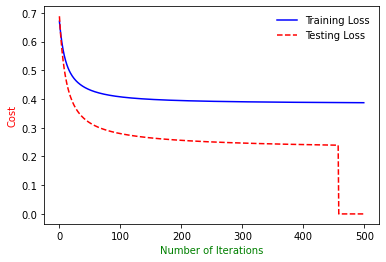

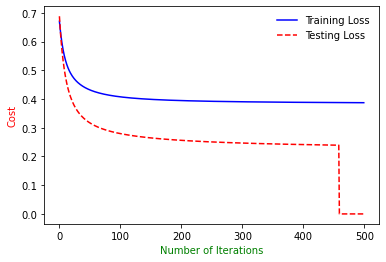

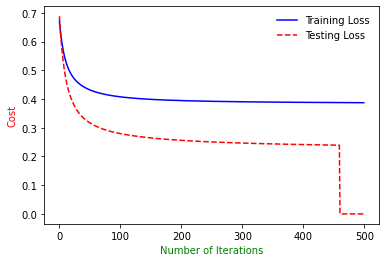

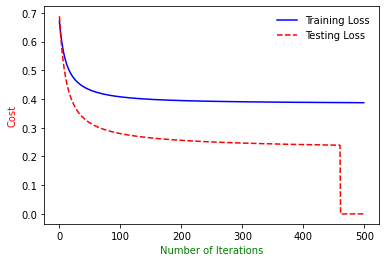

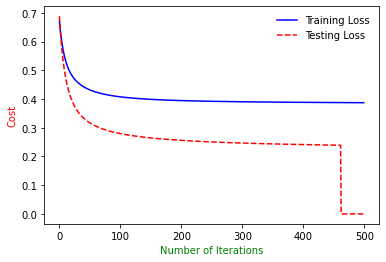

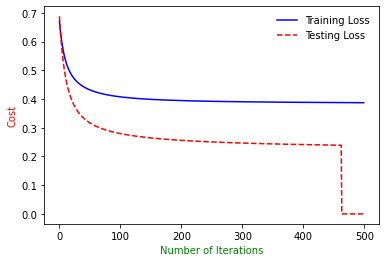

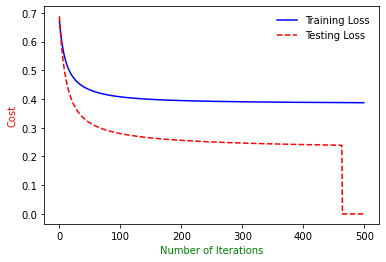

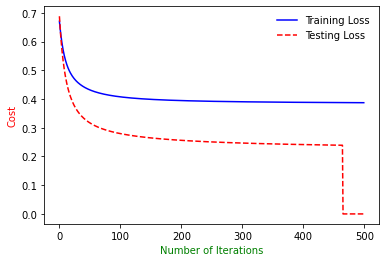

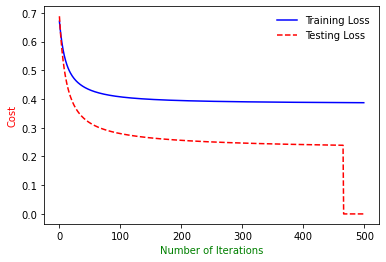

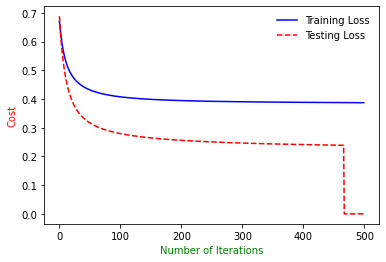

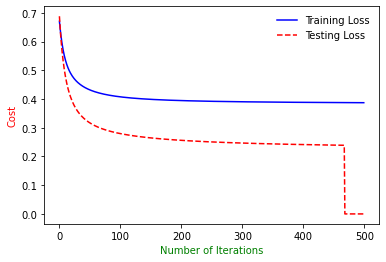

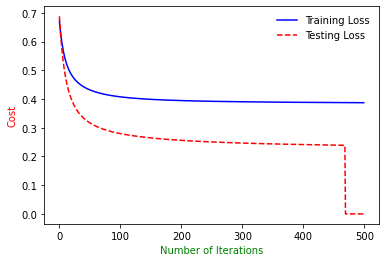

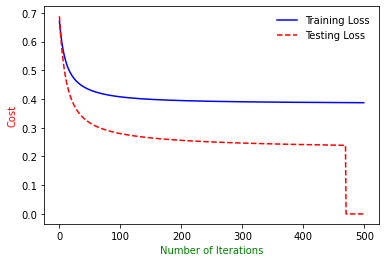

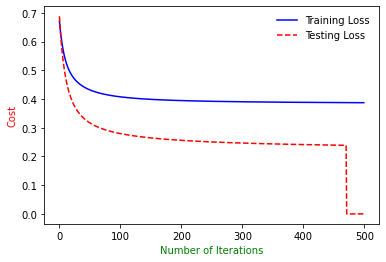

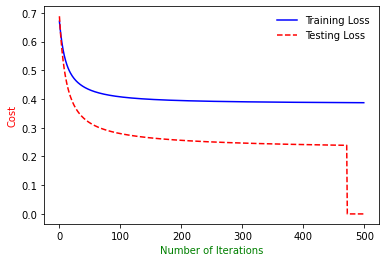

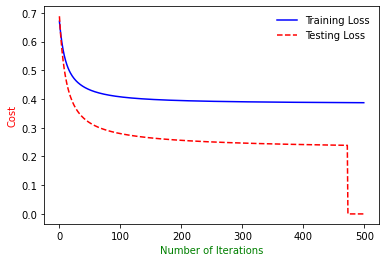

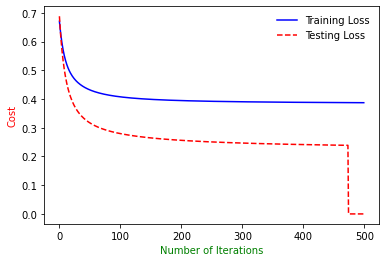

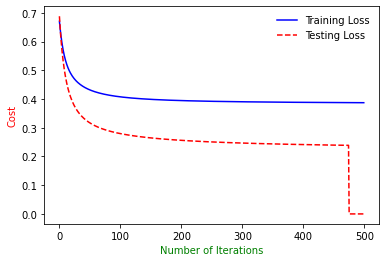

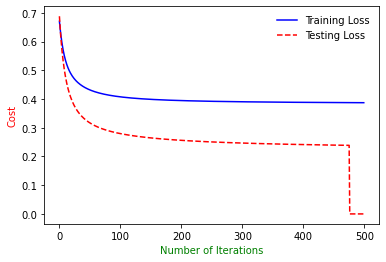

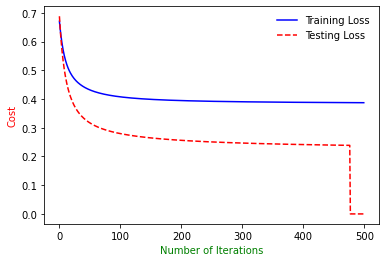

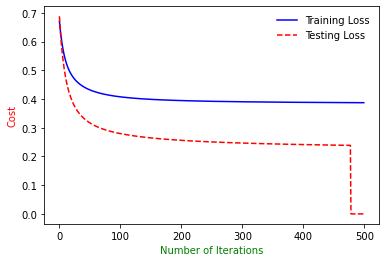

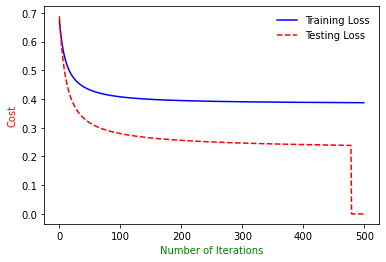

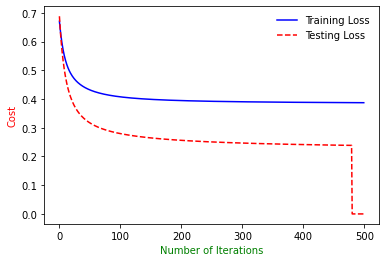

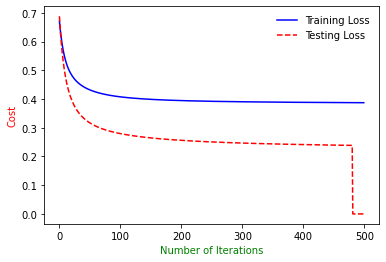

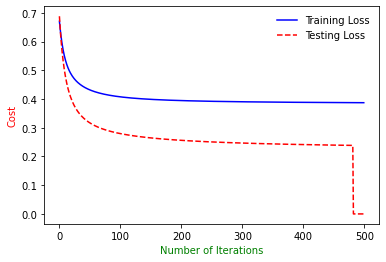

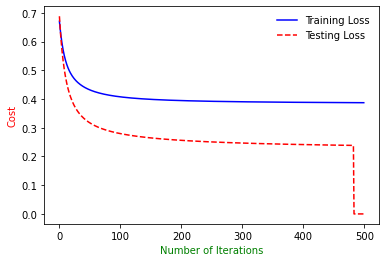

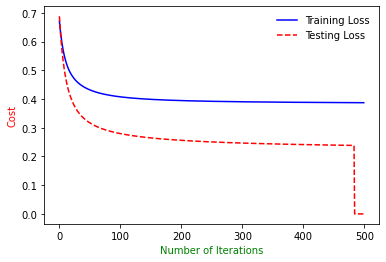

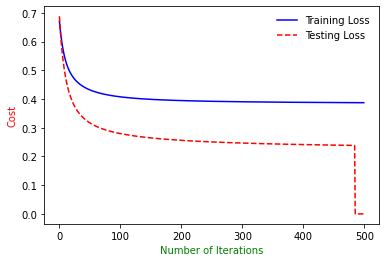

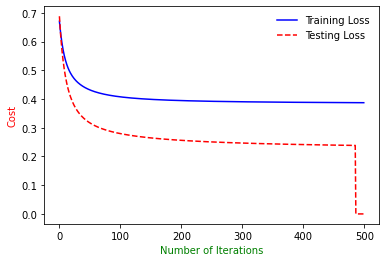

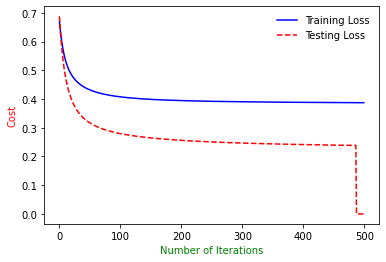

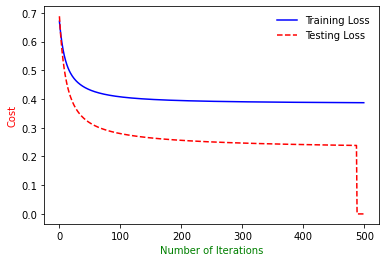

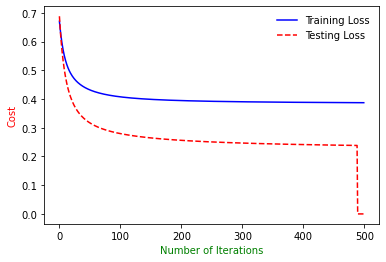

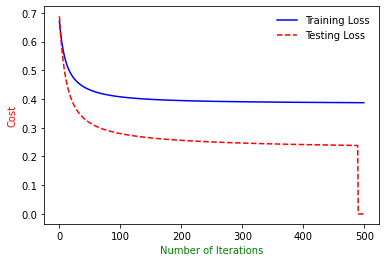

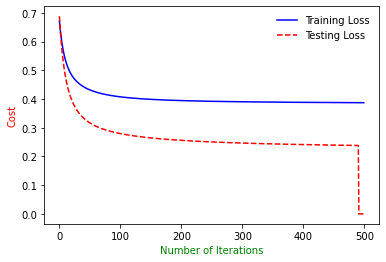

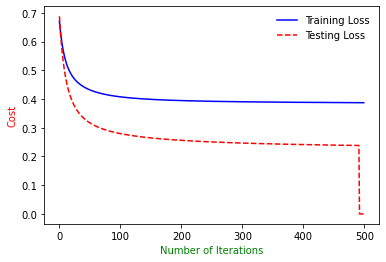

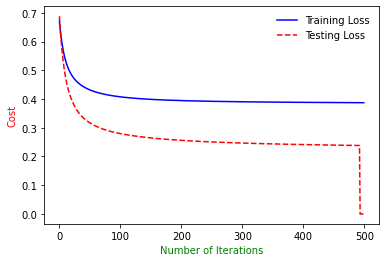

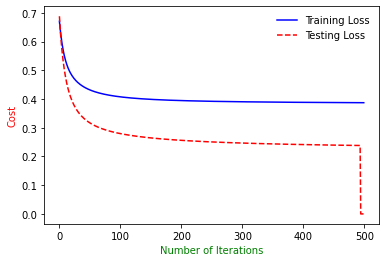

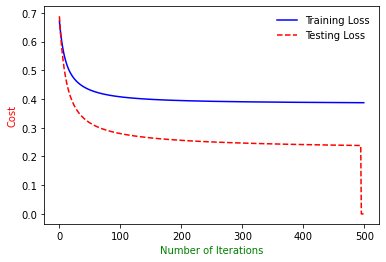

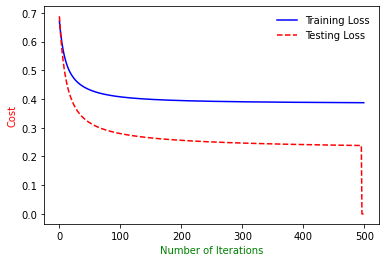

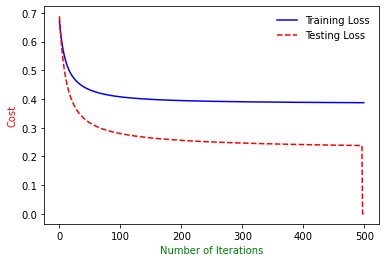

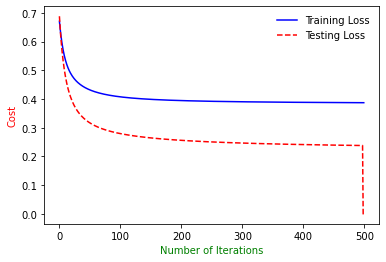

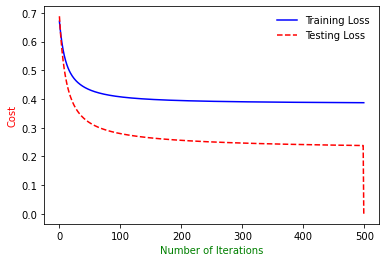

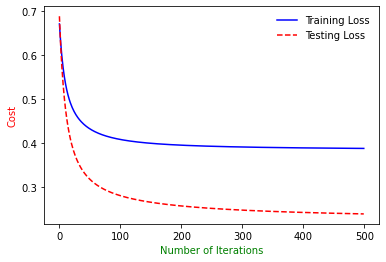

In [53]:
loss_history_test=np.zeros(iterations)
for i in range(iterations):
    loss_history_test[i]=loss_function(X_test,y_test,weight_history[i],bias_history[i])
    index=np.arange(0,iterations,1)
    plt.plot(index,loss_history,c='blue',linestyle='solid')
    plt.plot(index,loss_history_test,c='red',linestyle='dashed')
    plt.legend(['Training Loss','Testing Loss'],frameon=False)
    plt.xlabel('Number of Iterations').set_color('green')
    plt.ylabel('Cost').set_color('red')
    plt.show()
    

#### 4.3.6 直接调用Sklearn库

In [54]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)#fit 在这里相当于梯度下降
print('Sk_learn 回归准确率为{:.2f}%'.format(lr.score(X_test,y_test)*100))


/Users/weiye/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Sk_learn 回归准确率为91.80%
